<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importando-Bibliotecas" data-toc-modified-id="Importando-Bibliotecas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importando Bibliotecas</a></span></li><li><span><a href="#Lendo-e-Analisando-Base" data-toc-modified-id="Lendo-e-Analisando-Base-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Lendo e Analisando Base</a></span><ul class="toc-item"><li><span><a href="#Explicação-sobre-as-Features" data-toc-modified-id="Explicação-sobre-as-Features-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Explicação sobre as Features</a></span></li><li><span><a href="#Overview-da-Base" data-toc-modified-id="Overview-da-Base-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Overview da Base</a></span></li></ul></li><li><span><a href="#Análise-Exploratória" data-toc-modified-id="Análise-Exploratória-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Análise Exploratória</a></span></li><li><span><a href="#Data-Prep" data-toc-modified-id="Data-Prep-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Prep</a></span><ul class="toc-item"><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Feature Selection</a></span></li><li><span><a href="#Treino-e-Teste" data-toc-modified-id="Treino-e-Teste-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Treino e Teste</a></span></li><li><span><a href="#Pipeline-Categórico" data-toc-modified-id="Pipeline-Categórico-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Pipeline Categórico</a></span></li><li><span><a href="#Pipeline-Numérico" data-toc-modified-id="Pipeline-Numérico-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Pipeline Numérico</a></span></li><li><span><a href="#Pipeline-Genérico" data-toc-modified-id="Pipeline-Genérico-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Pipeline Genérico</a></span></li></ul></li><li><span><a href="#Modelo-Preditivo" data-toc-modified-id="Modelo-Preditivo-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modelo Preditivo</a></span><ul class="toc-item"><li><span><a href="#Regressão-Logística" data-toc-modified-id="Regressão-Logística-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Regressão Logística</a></span></li><li><span><a href="#Árvore-de-Decisão" data-toc-modified-id="Árvore-de-Decisão-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Árvore de Decisão</a></span></li><li><span><a href="#Florestas-Aleatórias" data-toc-modified-id="Florestas-Aleatórias-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Florestas Aleatórias</a></span></li><li><span><a href="#Voting-Classifier" data-toc-modified-id="Voting-Classifier-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Voting Classifier</a></span></li><li><span><a href="#Bootstrap-Agregating" data-toc-modified-id="Bootstrap-Agregating-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Bootstrap Agregating</a></span></li><li><span><a href="#Adaptative-Boosting" data-toc-modified-id="Adaptative-Boosting-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Adaptative Boosting</a></span></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Gradient Boosting</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>LightGBM</a></span></li></ul></li><li><span><a href="#Deep-Neural-Network" data-toc-modified-id="Deep-Neural-Network-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Deep Neural Network</a></span><ul class="toc-item"><li><span><a href="#Construction-Phase" data-toc-modified-id="Construction-Phase-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Construction Phase</a></span></li><li><span><a href="#Execution-Phase" data-toc-modified-id="Execution-Phase-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Execution Phase</a></span></li></ul></li></ul></div>

Este notebook tem por objetivo alocar o desenvolvimento de análise de dados envolvendo campanhas de marketing de uma instituição financeira portuguesa. Possuindo referência no renomado repositório de dados de Machine Laerning [UCI](https://archive.ics.uci.edu/ml/index.php), o conjunto [Bank Marketing Data Set](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) tem origem em um estudo realizado em 2014, onde ações de marketing baseadas principalmente em ligações telefônicas, foram aplicadas a um banco português, gerando assim uma base com 20 atributos relacionados ao tema, além de uma variável resposta indicando se o cliente submeteu (`yes`) ou não (`no`) a um depósito a prazo.

# Importando Bibliotecas

In [1]:
# Bibliotecas do projeto
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
from math import ceil
from datetime import datetime

# Bibliotecas de visualização
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Bibliotecas úteis
from utils.viz_utils import *
from utils.prep_utils import *
from utils.ml_utils import *

# Bibliotecas de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, \
    GradientBoostingClassifier
import lightgbm as lgb

# Bibliotecas de Deep Learning
import tensorflow as tf
from tensorflow import keras

# Lendo e Analisando Base

In [2]:
# Lendo base de dados
path = '../data/bank.csv'
df_ori = pd.read_csv(path, sep=',')
df_ori.columns = [col.lower().strip().replace('.', '_') for col in df_ori.columns]

print(f'Volumetria: {df_ori.shape}')
df_ori.head()

Volumetria: (11162, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Como mencionado anteriormente, temos 20 atributos e uma variável resposta no conjunto de dados. Pela análise das dimensões do dataset, é possível também pontuar que estamos falando de um conjunto com 41.188 amostras. Para auxiliar no entendimento do contexto do problema de negócio, vamos registrar uma breve descrição de cada uma das variáveis. A fonte das explicações a seguir é a mesma encontrada no [repositório UCI](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) onde este dataset está armazenado.

## Explicação sobre as Features

* **age:** idade do cliente contatado pela instituição financeira _(numérica)_;
* **job:** ocupação empregatícia do cliente _(categórica)_;
* **marital:** estado civil do cliente contatado _(categórica)_;
* **education:** nível de escolaridade do cliente _(categórica)_;
* **default:** cliente possui crédito por padrão? _(categórica)_;
* **housing:** cliente possui imóveis alugados? _(categórica)_;
* **loan:** cliente poissui empréstimo pessoal? _(categórica)_;
* **contact:**  tipo de comunicação utilizada no contato _(categórica)_;
* **month:** mês do último contato _(categórica)_;
* **duration:** duração, em segundos, do último contato. Nota: esse atributo possui grande influência na variável resposta (duração=0, y='no') e seu valor é conhecido somente após a realização do contato. Dessa forma, esta só deve ser incluída nas análises para fins de benchmark, sendo desejável sua exclusão se a abordagem for a criação de um modelo preditivo _(numérica)_;
* **campaign:** quantidade de contatos realizados durante a campanha para o cliente em questão _(numérica)_;
* **pdays:** número de dias após o último contato ao cliente (999 indica que o cliente não foi contatado anteriormente) _(numérica)_;
* **previous:** quantidade de contatos realizados antes da campanha atual para o cliente em questão _(numérica)_;
* **poutcome:** resultado da última campanha de marketing _(categórica)_;

_Variáveis adicionais encontradas somente no dataset bank-adittional do repositório UCI_
* **emp_var_rate:** taxa de variação empregatícia (indicador trimestral) _(numérica)_;
* **cons_price_idx:** índice de preços ao consumidos (indicador mensal) _(numérica)_;
* **cons_conf_idx:** índice de confiança do consumidor (indicador mensal) _(numérica)_;
* **euribor3m:** taxa Euribor 3 meses (indicador diário - mercado monetário da zona do Euro) _(numérica)_;
* **nr_employed:** número de empregados da instituição _(numérica)_;

## Overview da Base

Detalhadas as variáveis, vamos agora observar mais a fundo alguns indicadores essenciais sobre os dados através do método `data_overview()`.

In [3]:
# Instanciando classe de DataPrep
prep = DataPrep()

# Transformando variável resposta
df = df_ori.copy()
df['target'] = (df['deposit'] == 'yes') * 1
df.drop('deposit', axis=1, inplace=True)

# Visualizando dados de forma geral
target = 'target'
df_overview = prep.data_overview(df, label_name=target)
df_overview

,feature,qtd_null,percent_null,dtype,qtd_cat,target_pearson_corr
0,age,0,0.0,int64,0,0.034901
1,day,0,0.0,int64,0,-0.056326
2,poutcome,0,0.0,object,4,NaN
3,previous,0,0.0,int64,0,0.139867
4,pdays,0,0.0,int64,0,0.151593
5,campaign,0,0.0,int64,0,-0.128081
6,duration,0,0.0,int64,0,0.451919
7,month,0,0.0,object,12,NaN
8,contact,0,0.0,object,3,NaN
9,job,0,0.0,object,12,NaN


Analisando o resultado do método `data_overview()` é possível pontuar:

* Não existem dados nulos em nenhuma variável do conjunto de dados;
* Com exceção da feature `duration`, existem alguns outros exemplos com correlações interessantes com a variável target. Por exemplo, `nr_employed`, `emp_var_rate` e `euribor3m` se mostram features promissores a um primeiro momento.

# Análise Exploratória

Essa é uma etapa extremamente válida e útil para o prosseguimento da análise desse conjunto de dados. Nessa sessão, serão aplicadas técnicas de exploração de dados, visualizações e extração de insights para que o conteúdo do dataset possa ser, de fato, entendido como uma poderosa ferramenta preditiva dentro do contexto proposto.

Assim, serão propostas algumas perguntas ao longo dessa etapa que, a partir das técnicas já mencionadas, serão respondidas ou analisadas com maiores detalhes de acordo com as investigações realizadas no conjunto.

**Qual o balanceamento da variável resposta?**

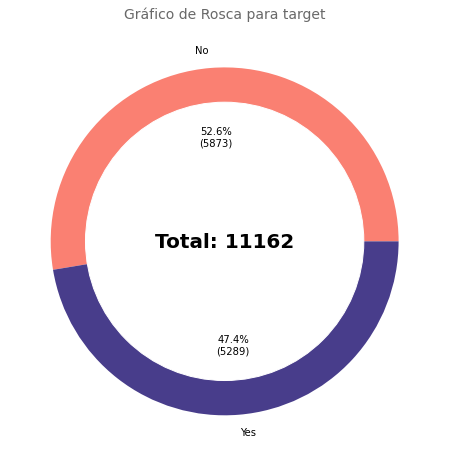

In [4]:
# Plotando gráfico para visualizar o balanceamento do target
label_names = ['No', 'Yes']
color_list = ['salmon', 'darkslateblue']

fig, ax = plt.subplots(figsize=(8, 8))
donut_plot(df, target, label_names, ax=ax, text=f'Total: {len(df)}', colors=color_list)
plt.show()

Pela análise do gráfico, é possível perceber que se trata de um conjunto de dados balanceado, ou seja, a variável resposta possui proporção semelhante para ambas as classes do conjunto.

**Quais as entradas das variáveis categóricas?**

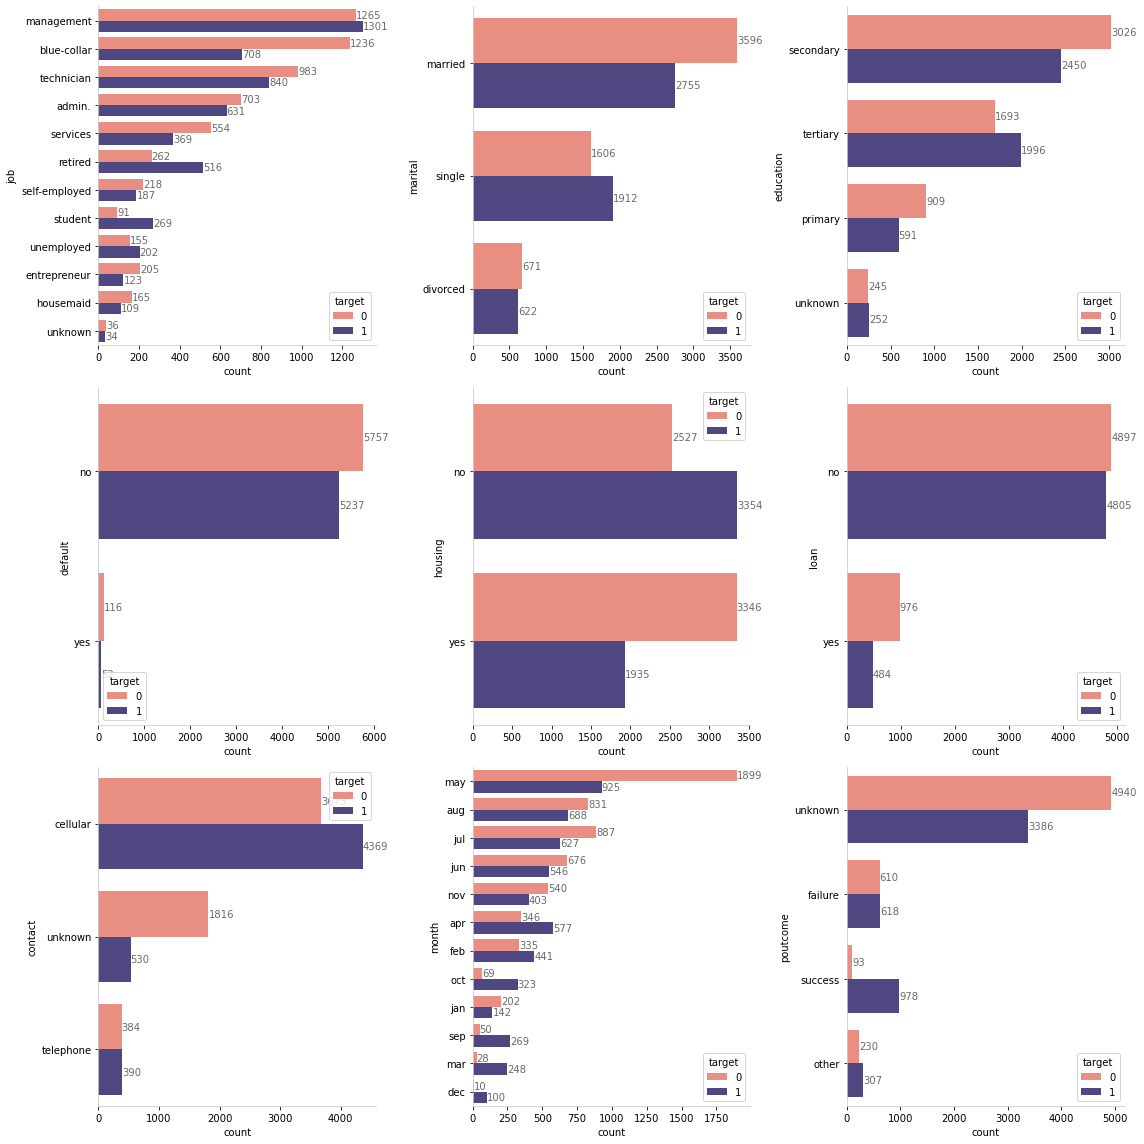

In [5]:
# Visualizando volumetria das entradas categóricas
cat_features = [col for col, dtype in df.dtypes.items() if dtype == 'object']
catplot_analysis(df, cat_features, fig_cols=3, hue='target', palette=['salmon', 'darkslateblue'], figsize=(16, 16))

**Como as variáveis numéricas estão distribuídas?**

In [6]:
# Parâmetros de análise
num_features = [col for col, dtype in df.dtypes.items() if dtype != 'object']
num_features.pop(num_features.index('target'))
color_list = ['salmon', 'darkslateblue']

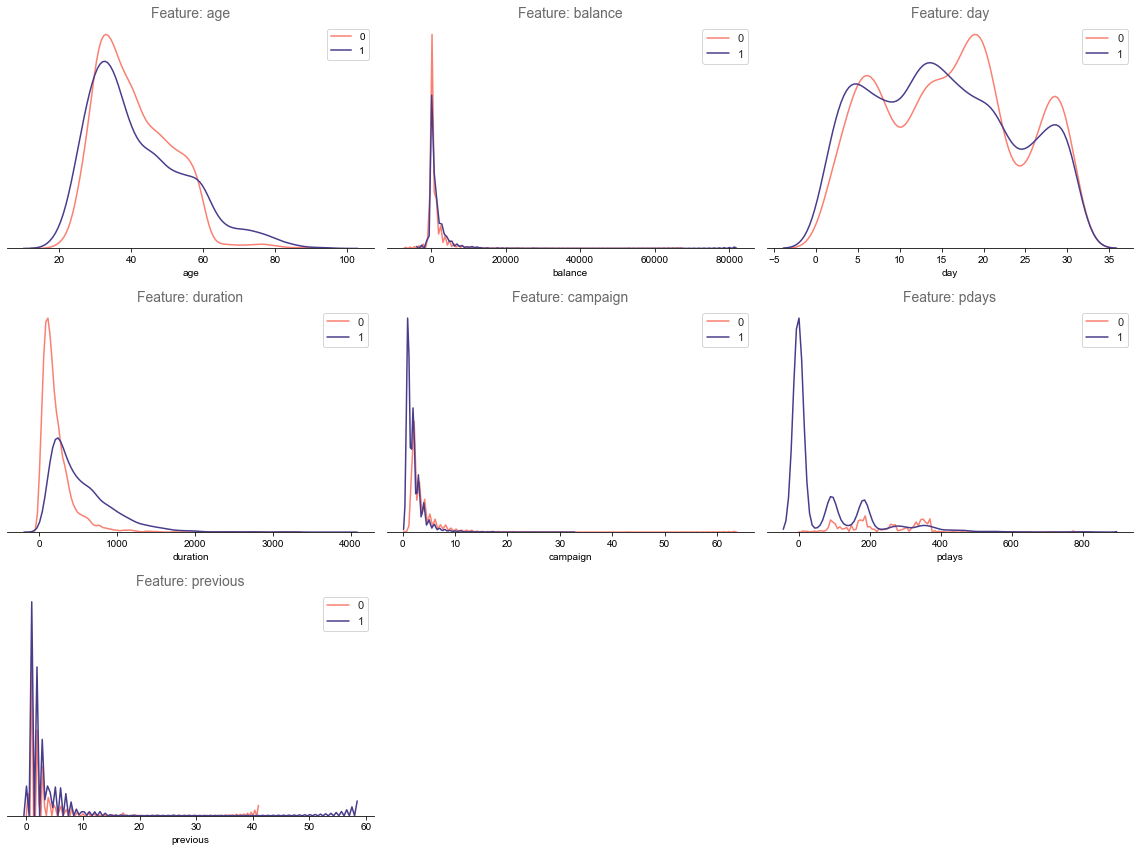

In [7]:
# Plot de distribuição
distplot(df, num_features, fig_cols=3, hue='target', color=color_list, figsize=(16, 12))

_Observando relação através do gráfico stripplot_

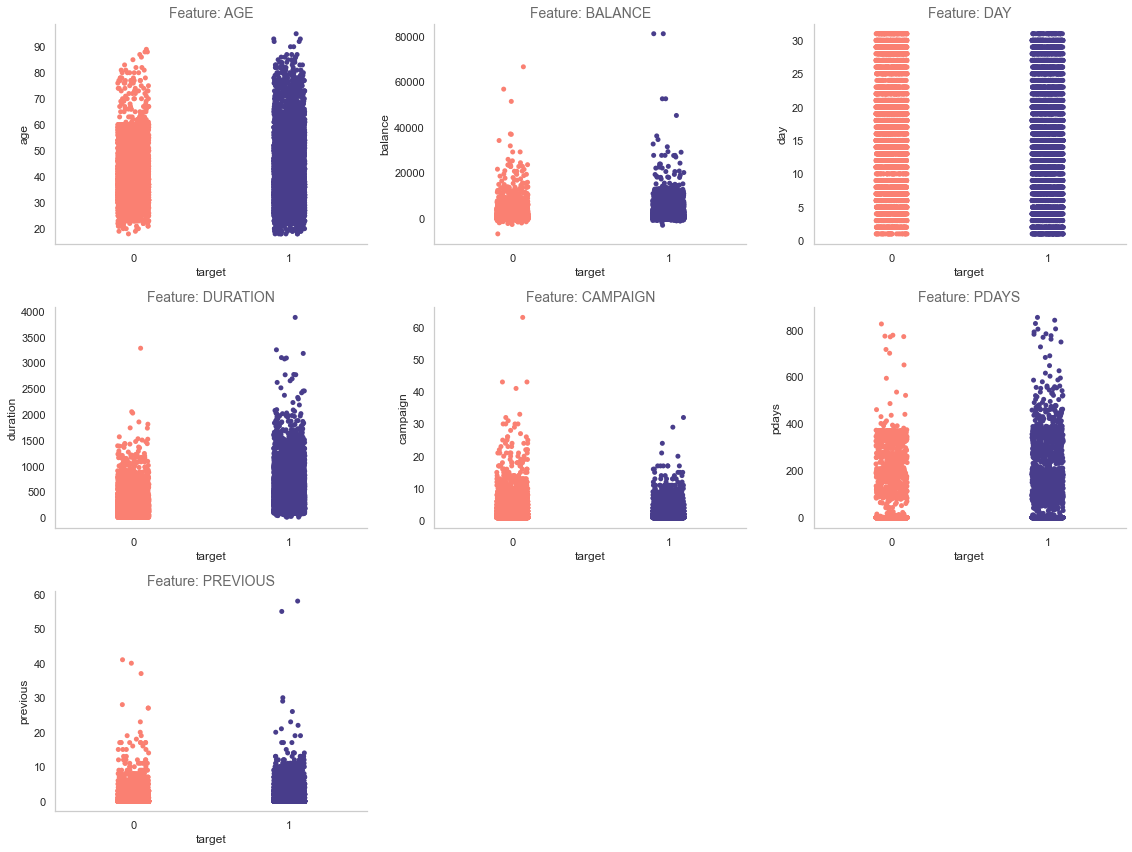

In [8]:
# Stripplot
stripplot(df, num_features, fig_cols=3, hue='target', palette=color_list)

_Observando relação através do gráfixo boxenplot_

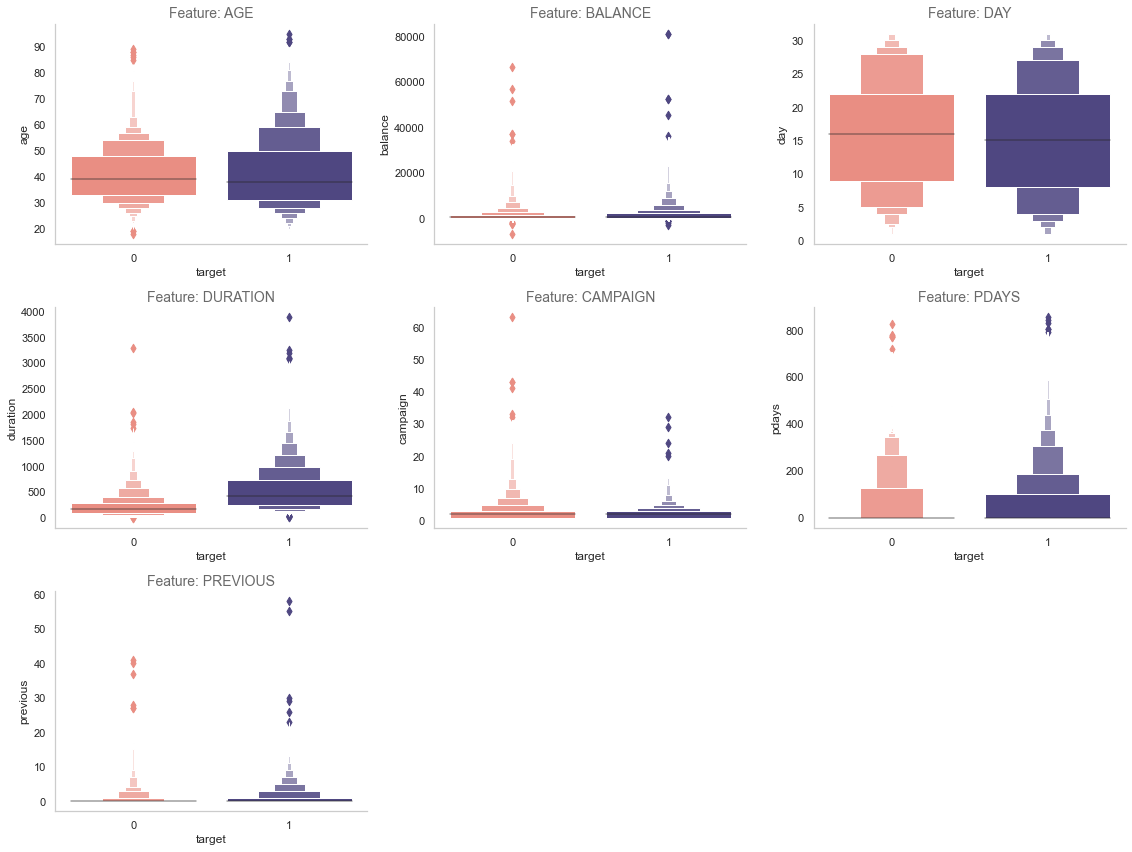

In [9]:
# Stripplot
boxenplot(df, num_features, fig_cols=3, hue='target', palette=color_list)

**Qual a correlação das features com o target?**

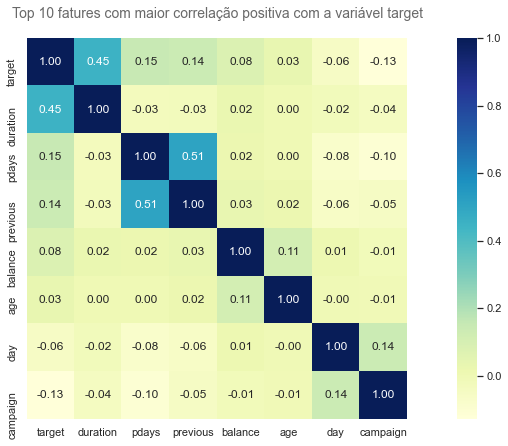

In [10]:
# Analisando top variáveis com maior correlação POSITIVA
top_pos_corr_cols = target_correlation_matrix(df, label_name='target', corr='positive')

# Data Prep

Após avaliar alguns parâmetros interessantes e extrair informações valiosas do conjunto de dados, vamos iniciar os preparativos para uma análise mais detalhadas sobre as operações necessárias para tratar os dados para um modelo preditivo.

## Feature Selection

A primeira etapa proposto diz respeito a filtragem de variáveis a serem considerados no treinamento. Levando em conta a documentação do conjunto de dados, a variável `duration` será retirada do dataset, visto que seu valor é conhecido somente após o contato do atendente com o cliente, eliminando assim o caráter preditivo do modelo (evitar a premissa de utilizar dados futuros pra prever o passado).

In [11]:
# Colunas a serem dropadas
to_drop = ['duration']
df_drop = df.drop(to_drop, axis=1)

# Verificando
print(f'Dimensões antes do drop: {df.shape}')
print(f'Dimensões após o drop: {df_drop.shape}')
df_drop.head()

Dimensões antes do drop: (11162, 17)
Dimensões após o drop: (11162, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,1


## Treino e Teste

Um ponto fundamental dentro do pipeline de treinamento de modelos de Machine Learning é, sem dúvidas, a separação do dataset em conjuntos de treino e teste. Isso permite a otimização do modelo em dados utilizados para treinamento e sua posterior validação em dados de teste, ou seja, dados inacessíveis durante o treinamento do modelo.

In [12]:
# Aplicando separação dos dados
X = df_drop.drop('target', axis=1)
y = df_drop['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)
print(f'Dimensões de X_train: {X_train.shape}')
print(f'Dimensões de X_test: {X_test.shape}')

Dimensões de X_train: (8929, 15)
Dimensões de X_test: (2233, 15)


A partir deste momento, deixaremos os dados de `teste` imóveis até que a intenção seja validar um modelo já treinado pelos dados de `treino`. Dessa forma, aproveitando o tópico de separação da base, vamos também criar dois novos conjuntos: um apenas com variáveis categóricas e outro apenas com variáveis numéricas.

In [13]:
# Separando features do conjunto por tipo primitivo
num_features = [col for col, dtype in X_train.dtypes.items() if dtype != 'object']
cat_features = [col for col, dtype in X_train.dtypes.items() if dtype == 'object']
print(f'Quantidade de variáveis numéricas: {len(num_features)}')
print(f'Quantidade de variáveis categóricas: {len(cat_features)}')

# Separando conjuntos por tipo primitivo
X_train_num = X_train[num_features]
X_train_cat = X_train[cat_features]
print(f'\nDimensões dos dados numéricos: {X_train_num.shape}')
print(f'Dimensões dos dados categóricos: {X_train_cat.shape}')

Quantidade de variáveis numéricas: 6
Quantidade de variáveis categóricas: 9

Dimensões dos dados numéricos: (8929, 6)
Dimensões dos dados categóricos: (8929, 9)


Como uma forma de automatizar esse processo, vamos criar uma classe responsável por realizar a separação dos conjuntos por tipo primitivo automaticamente. A ideia é que, no final do projeto, seja possível incorporar essa classe em um `Pipeline` completo de preparação.

In [14]:
# Classe para separação dos conjuntos por tipo primitivo
class SplitDataDtype(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Retornando colunas por tipo primitivo
        self.num_features = [col for col, dtype in X.dtypes.items() if dtype != 'object']
        self.cat_features = [col for col, dtype in X.dtypes.items() if dtype == 'object']
        
        # Indexando conjuntos
        X_num = X[self.num_features]
        X_cat = X[self.cat_features]
        
        return X_num, X_cat

In [15]:
# Inicializando classe e separando dados
dtype_splitter = SplitDataDtype()
X_train_num, X_train_cat = dtype_splitter.fit_transform(X_train)

print(f'Dimensões dos dados numéricos: {X_train_num.shape}')
print(f'Dimensões dos dados categóricos: {X_train_cat.shape}')

Dimensões dos dados numéricos: (8929, 6)
Dimensões dos dados categóricos: (8929, 9)


## Pipeline Categórico

Após a aplicação do processo de separação do conjunto em variáveis numéricas e categóricas, nessa etapa, vamos aplicar um processo de encoding nas variáveis categóricas do nosso conjunto de dados. Isso é importante para que o algoritmo de Machine Learning possa receber os _inputs_ de forma adequada.

In [16]:
# Criando classe para tratamento
class DummiesEncoding(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Coletando variáveis
        self.cat_features_ori = [col for col, dtype in X.dtypes.items() if dtype == 'object']
        
        # Aplicando encoding com pandas get_dummies()
        X_cat_dum = pd.get_dummies(X)
        
        # Unindo dataset e dropando antigas colunas
        X_dum = X.join(X_cat_dum)
        X_dum = X_dum.drop(self.cat_features_ori, axis=1)
        self.features_after_encoding = list(X_dum.columns)
        
        return X_dum

In [17]:
# Aplicando encoding nos dados categóricos
encoder = DummiesEncoding()
X_train_encoded = encoder.fit_transform(X_train_cat)

print(f'Dimensões de X_train_encoded: {X_train_encoded.shape}')
X_train_encoded.head()

Dimensões de X_train_encoded: (8929, 44)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
3955,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
11150,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5173,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3017,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2910,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


## Pipeline Numérico

No tratamento dado aos atributos numéricos do nosso conjunto, é possível destacar, nesse caso, apenas a possibilidade da normalização dos dados. Para alguns algoritmos, como Regressão Logística por exemplo, essa normalização é importante para que o algoritmo de otimização possa encontrar o custo mínimo de forma mais rápida. Entretanto, em outros casos como Árvores de Decisão, a normalização é indiferente a performance do modelo.

Como forma didática, vamos construir um pipeline para aplicar a normalização do conjunto como uma forma de testar diversos modelos de classificação.

In [18]:
# Aplicando normalização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)

# Verificando primeira linha do array resultante
X_train_scaled[0]

array([-1.11404081,  1.34627101, -0.66666896,  0.92180438,  1.37403675,
        0.99172215])

## Pipeline Genérico

Definidas as etapas de preparação do nosso conjunto de dados como um todo, vamos agora consolidar os passos em um único Pipeline, sendo este alimentado pelos pipelines categórico e numérico de forma separada. Assim, é necessário então definir as etapas individuais de preparação antes de consolidar tudo em um único bloco de código

In [19]:
# Aplicando bloco inicial para separação dos dados por tipo primitivo
dtype_spliter = SplitDataDtype()
X_num, X_cat = dtype_spliter.fit_transform(X_train)
num_features = dtype_spliter.num_features
cat_features = dtype_spliter.cat_features

# Definindo pipeline numérico
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Definindo pipeline categórico
cat_pipeline = Pipeline([
    ('encoder', DummiesEncoding())
])

# Definindo pipeline genérico
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

# Aplicando pipeline de preparação
X_train_prep = full_pipeline.fit_transform(X_train)

# Retornando features
cat_features_encoded = full_pipeline.named_transformers_['cat']['encoder'].features_after_encoding
model_features = num_features + cat_features_encoded

In [20]:
# Verificando resultado
print(f'Dimensões de X_train: {X_train.shape}')
print(f'Dimensões de X_train_prep: {X_train_prep.shape}')
print(f'Quantidade de features retornadas: {len(model_features)}')
print(f'\nPrimeira linha de X_train_prep: \n\n{X_train_prep[0]}')

Dimensões de X_train: (8929, 15)
Dimensões de X_train_prep: (8929, 50)
Quantidade de features retornadas: 50

Primeira linha de X_train_prep: 

[-1.11404081  1.34627101 -0.66666896  0.92180438  1.37403675  0.99172215
  0.          0.          0.          0.          0.          0.
  0.          0.          1.          0.          0.          0.
  0.          0.          1.          0.          0.          1.
  0.          1.          0.          1.          0.          1.
  0.          1.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          1.          1.          0.
  0.          0.        ]


In [21]:
# Aplicando pipeline nos dados de teste
X_test_prep = full_pipeline.fit_transform(X_test)

print(f'Dimensões de X_test_prep: {X_test_prep.shape}')

Dimensões de X_test_prep: (2233, 50)


In [22]:
# Salvando dados preparados em um set único
set_prep = {
    'X_train_prep': X_train_prep,
    'X_test_prep': X_test_prep,
    'y_train': y_train,
    'y_test': y_test
}

# Modelo Preditivo

Concluidas as etapas de construção de um pipeline completo de preparação dos dados, vamos iniciar agora as etapas necessárias para o treinamento de um modelo de Machine Learning capaz de retornar a probabilidade de um cliente aceitar um produto bancário de acordo com as variáveis contidas em nossa base.

Normalmente, é preferível escolher um modelo extremamente simples e rápido de se treinar como baseline. Assim, é possível ter uma ideia sobre como será a performance desse modelo com os dados que temos em mãos, abrindo espaços para conclusões rápidas e medidas a serem tomadas de forma a otimizar os resultados. Em uma primeira tentativa, vamos considerar o algoritmo de `Regressão Logística`.

## Regressão Logística

De modo a validar uma classe construída para facilitar o treinamento e análise de modelos de classificação binária, vamos utilizar a ferramenta `BinaryBaselineClassifier()`.

In [23]:
# Criando modelo de Regressão Logística e instanciando classe
logreg_clf = LogisticRegression()
logreg_tool = BinaryBaselineClassifier(logreg_clf, set_prep, model_features)

In [24]:
# Definindo grid de hiperparâmetros
logreg_param_grid = {
    'C': np.linspace(0.1, 10, 20),
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced', None],
    'random_state': [42],
    'solver': ['liblinear']
}

# Treinando modelo
logreg_tool.fit(rnd_search=True, param_grid=logreg_param_grid, scoring='roc_auc')

Treinando modelo LogisticRegression com RandomSearchCV.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.9s


Treinamento finalizado com sucesso! Configurações do modelo: 

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.6s finished


**Métricas do modelo**

In [25]:
# Verificando performance
logreg_train_performance = logreg_tool.evaluate_performance()
logreg_train_performance

,approach,acc,precision,recall,f1,auc,total_time
LogisticRegression,Train (CV=5),0.6948,0.6958,0.6303,0.6613,0.7581,1.412


**Matriz de confusão**

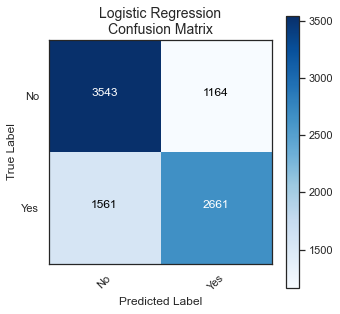

In [26]:
# Definindo parâmetros para plotagem da matriz
title = 'Logistic Regression\nConfusion Matrix'
classes = ['No', 'Yes']

# Criando figura e chamando função
plt.figure(figsize=(5, 5))
logreg_tool.plot_confusion_matrix(classes, title=title)
plt.show()

**Curva ROC**

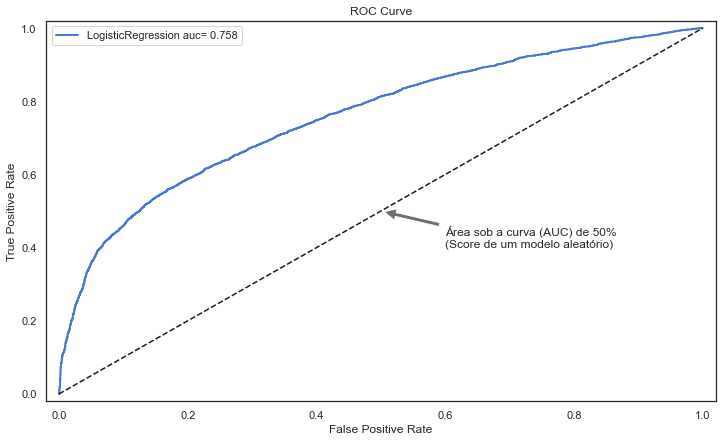

In [27]:
plt.figure(figsize=(12, 7))
logreg_tool.plot_roc_curve()
plt.annotate('Área sob a curva (AUC) de 50%\n(Score de um modelo aleatório)', xy=(0.5, 0.5), xytext=(0.6, 0.4),
             arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.show()

**Learning Curve**

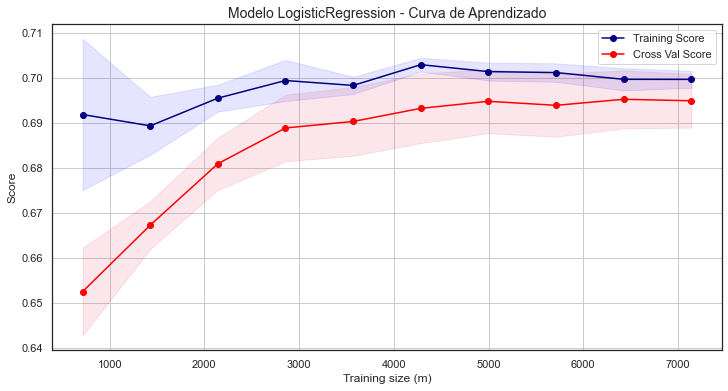

In [28]:
# Plotando curva de aprendizado do modelo
logreg_tool.plot_learning_curve()

Analisando os resultados obtidos com o algoritmo de Regressão Logística, é possível concluir que o modelo de classificação apresentou resultados satisfatórios dentro do esperado para um baseline. Com uma acurácia de 70% e uma AUC de 76%, é possível dizer que o modelo sofre, de certa forma, de um viés elevado.

Para mitigar esse efeito e aumentar a performance, seria possível:

    - Coletar mais features pro conjunto de dados;
    - Coletar mais dados para o treinamento do modelo;
    - Aumentar o grau polinomial do modelo;
    - Treinar um modelo mais complexo.

**Avaliando nos dados de teste**

In [29]:
# Visualizando a performance completa do modelo de Regressão Logística
logreg_test_performance = logreg_tool.evaluate_performance(test=True)
logreg_performance = logreg_train_performance.append(logreg_test_performance)
logreg_performance

,approach,acc,precision,recall,f1,auc,total_time
LogisticRegression,Train (CV=5),0.6948,0.6958,0.6303,0.6613,0.7581,1.412
LogisticRegression,Test Set,0.7210,0.7440,0.6345,0.6849,0.7581,0.214


## Árvore de Decisão

Após termos feito uma avaliação completa do modelo utilizando um algoritmo baseline (`LogisticRegression`), temos condições de avançar nos testes em outros algoritmos. Ainda sem propor um aumento considerável na complexidade do modelo, vamos utilizar, nessa segunda tentativa, o algoritmo `DecisionTrees`.

Em resumo, trata-se de um algoritmo com um grande capacidade de decisão baseada em uma fórmula de entropia para divisão do conjunto de dados da melhor forma possível. Em termos de baseline, as Árvores de Decisão são muito úteis para avaliar as features mais importantes para um modelo preditivo.

In [30]:
# Instanciando modelo e classe preditiva
tree_model = DecisionTreeClassifier()
tree_tool = BinaryBaselineClassifier(tree_model, set_prep, model_features)

In [31]:
# Definindo grid de hiperparâmetros e treinando modelo
tree_param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [3, 5, 10, 20],
    'max_features': np.arange(1, X_train_prep.shape[1]),
    'class_weight': ['balanced', None],
    'random_state': [42]
}

tree_tool.fit(rnd_search=True, scoring='roc_auc', param_grid=tree_param_grid)

Treinando modelo DecisionTreeClassifier com RandomSearchCV.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Treinamento finalizado com sucesso! Configurações do modelo: 

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=15, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.6s finished


**Métricas do modelo**

In [32]:
# Verificando performance
tree_train_performance = tree_tool.evaluate_performance()
tree_train_performance

,approach,acc,precision,recall,f1,auc,total_time
DecisionTreeClassifier,Train (CV=5),0.6643,0.6817,0.5528,0.6089,0.7225,0.567


**Matriz de confusão**

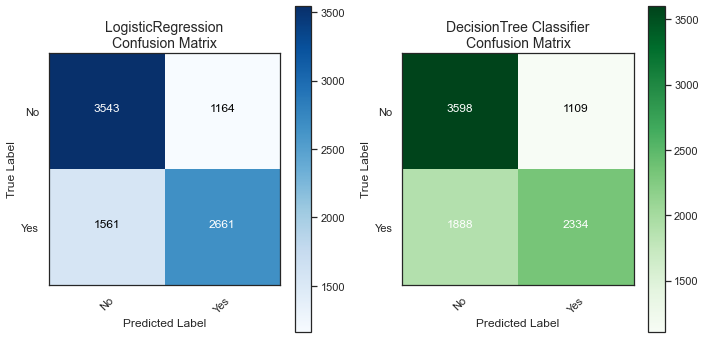

In [33]:
# Definindo parâmetros para plotagem das matrizes
logreg_title = 'LogisticRegression\nConfusion Matrix'
tree_title = 'DecisionTree Classifier\nConfusion Matrix'
classes = ['No', 'Yes']

# Criando figura e chamando função
plt.figure(figsize=(10, 5))

# Regressão Logística
plt.subplot(1, 2, 1)
logreg_tool.plot_confusion_matrix(classes, title=logreg_title)

# Árvore de Decisão
plt.subplot(1, 2, 2)
tree_tool.plot_confusion_matrix(classes, title=tree_title, cmap=plt.cm.Greens)
plt.tight_layout()
plt.show()

**Curva ROC**

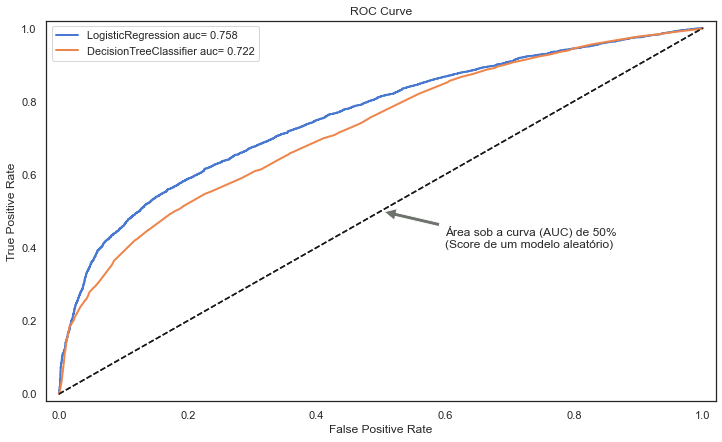

In [34]:
# Criando figura e chamando função pra cada estimator
plt.figure(figsize=(12, 7))

logreg_tool.plot_roc_curve()
tree_tool.plot_roc_curve()
plt.annotate('Área sob a curva (AUC) de 50%\n(Score de um modelo aleatório)', xy=(0.5, 0.5), xytext=(0.6, 0.4),
             arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.show()

**Learning Curve**

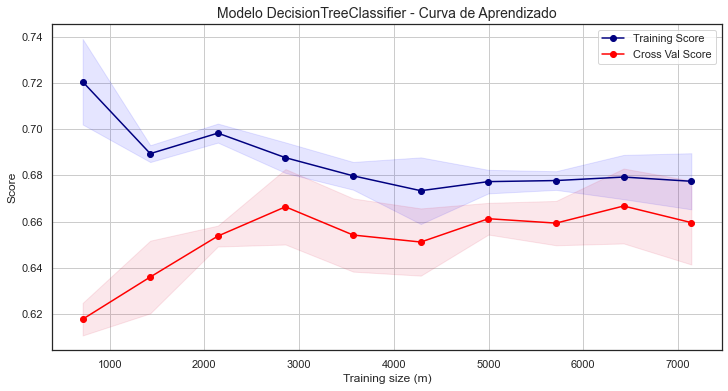

In [35]:
# Plotando curva de aprendizado do modelo
tree_tool.plot_learning_curve()

Os resultados obtidos com o modelo de Árvore de Decisão não foram tão satisfatórios quanto os obtidos pela Regressão Logística. Comparando os dois métrica a métrica, DecisionTrees possui apenas `precision` mais elevada, perdendo em todas as demais.

Como próximos passos, vamos testar algoritmos mais robustos, como Florestas Aleatórias.

**Feature Importance**

In [36]:
# Avaliando features mais importantes pro modelo
feat_imp = tree_tool.feature_importance_analysis()
feat_imp.head(30)

,feature,importance
0,poutcome_unknown,0.302010
1,contact_unknown,0.181082
2,housing_no,0.159393
3,poutcome_failure,0.106933
4,month_apr,0.067558
5,month_oct,0.032343
6,pdays,0.028110
7,month_may,0.015797
8,age,0.014289
9,marital_married,0.013182


**Avaliando nos dados de teste**

In [37]:
# Visualizando a performance completa do modelo de Regressão Logística
tree_test_performance = tree_tool.evaluate_performance(test=True)
tree_performance = tree_train_performance.reset_index().append(tree_test_performance.reset_index())

all_performances = logreg_performance.reset_index().append(tree_performance).reset_index(drop=True)
cm = sns.light_palette('cornflowerblue', as_cmap=True)
all_performances.style.background_gradient(cmap=cm)

,index,approach,acc,precision,recall,f1,auc,total_time
0,LogisticRegression,Train (CV=5),0.6948,0.6958,0.6303,0.6613,0.7581,1.412
1,LogisticRegression,Test Set,0.721,0.744,0.6345,0.6849,0.7581,0.214
2,DecisionTreeClassifier,Train (CV=5),0.6643,0.6817,0.5528,0.6089,0.7225,0.567
3,DecisionTreeClassifier,Test Set,0.6538,0.6248,0.6898,0.6557,0.7225,0.151


## Florestas Aleatórias

Seguindo a proposta de encontrar um modelo que possa apresentar uma boa performance para nosso problema de negócio, vimos que o algoritmo de Árvores de Decisão não funcionou do modo esperado, apresentando performance abaixo do nosso baseline de Regressão Logística.

Dessa forma, vamos verificar a performance obtida com um modelo mais complexo: Florestas Aleatórias (ou `RandomForestClassifier`). A ideia básica deste modelo é a união de diversas árvores de decisão, proporcionando assim uma decisão mais robusta em relação as decisões obtidas em cada uma das árvores que compõe a floresta.

In [38]:
# Instanciando modelo e classe preditiva
forest_model = RandomForestClassifier()
forest_tool = BinaryBaselineClassifier(forest_model, set_prep, model_features)

In [39]:
# Definindo grid de hiperparâmetros e treinando modelo
forest_param_grid = {
    'bootstrap': [True, False],
    'max_depth': [3, 5, 10, 20, 50],
    'n_estimators': [50, 100, 200, 500],
    'random_state': [42],
    'max_features': ['auto', 'sqrt'],
    'class_weight': ['balanced', None]
}

forest_tool.fit(rnd_search=True, scoring='roc_auc', param_grid=forest_param_grid)

Treinando modelo RandomForestClassifier com RandomSearchCV.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   25.4s finished


Treinamento finalizado com sucesso! Configurações do modelo: 

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


**Métricas do modelo**

In [40]:
# Verificando performance
forest_train_performance = forest_tool.evaluate_performance()
forest_train_performance

,approach,acc,precision,recall,f1,auc,total_time
RandomForestClassifier,Train (CV=5),0.7284,0.7814,0.591,0.6727,0.7832,34.71


**Matriz de confusão**

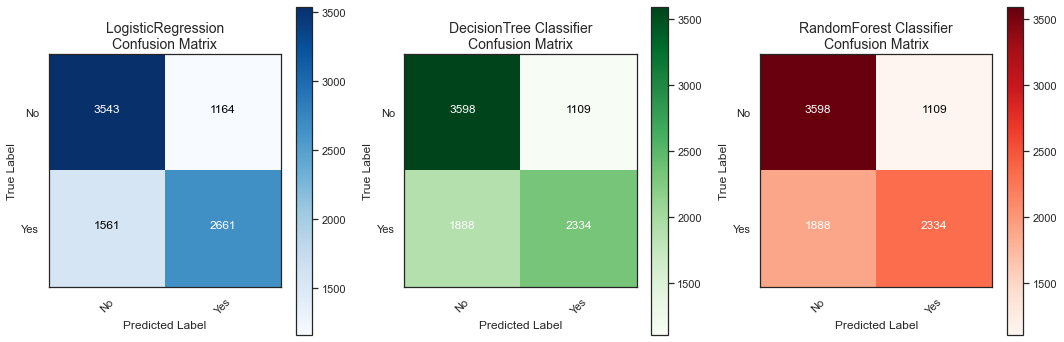

In [41]:
# Definindo parâmetros para plotagem das matrizes
logreg_title = 'LogisticRegression\nConfusion Matrix'
tree_title = 'DecisionTree Classifier\nConfusion Matrix'
forest_title = 'RandomForest Classifier\nConfusion Matrix'
classes = ['No', 'Yes']

# Criando figura e chamando função
plt.figure(figsize=(15, 5))

# Regressão Logística
plt.subplot(1, 3, 1)
logreg_tool.plot_confusion_matrix(classes, title=logreg_title)

# Árvore de Decisão
plt.subplot(1, 3, 2)
tree_tool.plot_confusion_matrix(classes, title=tree_title, cmap=plt.cm.Greens)

# Florestas Aleatórias
plt.subplot(1, 3, 3)
tree_tool.plot_confusion_matrix(classes, title=forest_title, cmap=plt.cm.Reds)

plt.tight_layout()
plt.show()

**Curva ROC**

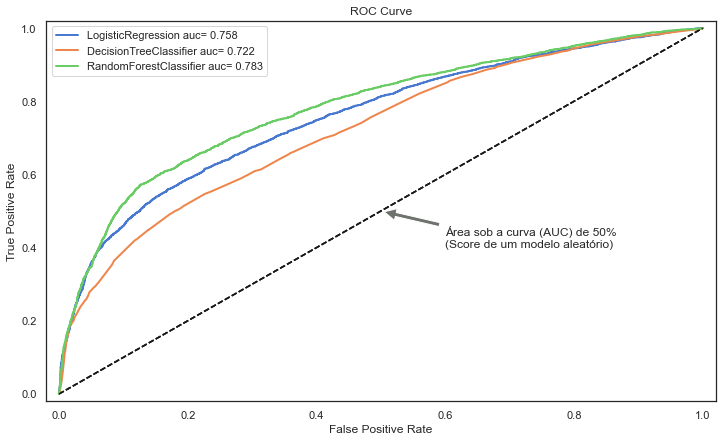

In [42]:
# Criando figura e chamando função pra cada estimator
plt.figure(figsize=(12, 7))

# Plotando curva para os modelos
logreg_tool.plot_roc_curve()
tree_tool.plot_roc_curve()
forest_tool.plot_roc_curve()

# Anotação
plt.annotate('Área sob a curva (AUC) de 50%\n(Score de um modelo aleatório)', xy=(0.5, 0.5), xytext=(0.6, 0.4),
             arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.show()

**Learning Curve**

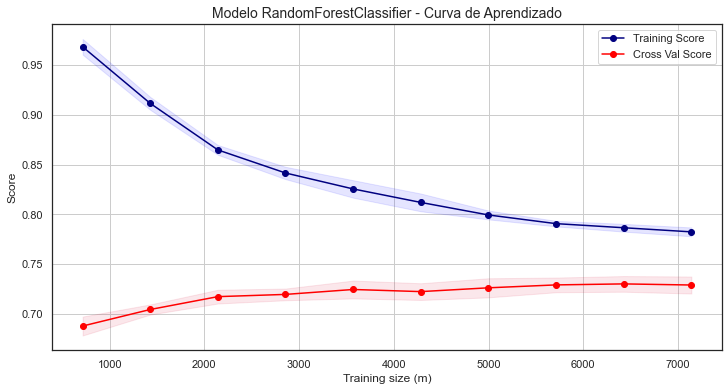

In [43]:
# Plotando curva de aprendizado do modelo
forest_tool.plot_learning_curve()

Com uma performance melhor em relação aos dois modelos treinados anteriormente (exceto em Recall contra a Regressão Logística), o modelo RandomForest é um bom candidato para descrever a probabilidade de um cliente assinar um determinado produto bancário.

Entretanto, observando a curva de aprendizado, entende-se que este modelo pode estar sofrendo de uma variância elevada (gap entre performance com dados de treino e com dados de validação). De toda forma, ainda existem alguns outros modelos que podem ser avaliados dentro da nossa proposta.

**Avaliando nos dados de teste**

In [44]:
# Visualizando a performance completa do modelo de Regressão Logística
forest_test_performance = forest_tool.evaluate_performance(test=True)
forest_performance = forest_train_performance.reset_index().append(forest_test_performance.reset_index())

all_performances = all_performances.append(forest_performance).reset_index(drop=True)
cm = sns.light_palette('cornflowerblue', as_cmap=True)
all_performances.style.background_gradient(cmap=cm)

,index,approach,acc,precision,recall,f1,auc,total_time
0,LogisticRegression,Train (CV=5),0.6948,0.6958,0.6303,0.6613,0.7581,1.412
1,LogisticRegression,Test Set,0.721,0.744,0.6345,0.6849,0.7581,0.214
2,DecisionTreeClassifier,Train (CV=5),0.6643,0.6817,0.5528,0.6089,0.7225,0.567
3,DecisionTreeClassifier,Test Set,0.6538,0.6248,0.6898,0.6557,0.7225,0.151
4,RandomForestClassifier,Train (CV=5),0.7284,0.7814,0.591,0.6727,0.7832,34.71
5,RandomForestClassifier,Test Set,0.734,0.7997,0.5914,0.68,0.7832,7.969


## Voting Classifier

Nessa sessão, vamos aplicar uma abordagem conhecida como `Voting Classifier` que, em resumo, representa um conjunto de modelos realizando predições em paralelos e, no final, é considerada a predição da maioria dos classificadores do conjunto como a predição oficial do modelo.

In [45]:
# Instanciando modelo e classe preditiva
voting_model = VotingClassifier(
    estimators=[('logreg', logreg_tool.trained_model), ('forest', forest_tool.trained_model)],
    voting='soft'
)

# Treinando modelo
voting_tool = BinaryBaselineClassifier(voting_model, set_prep, model_features)
voting_tool.fit(rnd_search=False)

Treinando modelo VotingClassifier.
Treinamento finalizado com sucesso! Configurações do modelo: 

VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=0.1, class_weight='balanced',
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l1',
                                                 random_state=42,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('forest',
                              RandomForestClassifier(bootstrap=False,
                                                     class_weight=None

**Métricas do modelo**

In [46]:
# Verificando performance
voting_train_performance = voting_tool.evaluate_performance()
voting_train_performance

,approach,acc,precision,recall,f1,auc,total_time
VotingClassifier,Train (CV=5),0.7206,0.7522,0.6099,0.6734,0.7777,35.38


**Matriz de confusão**

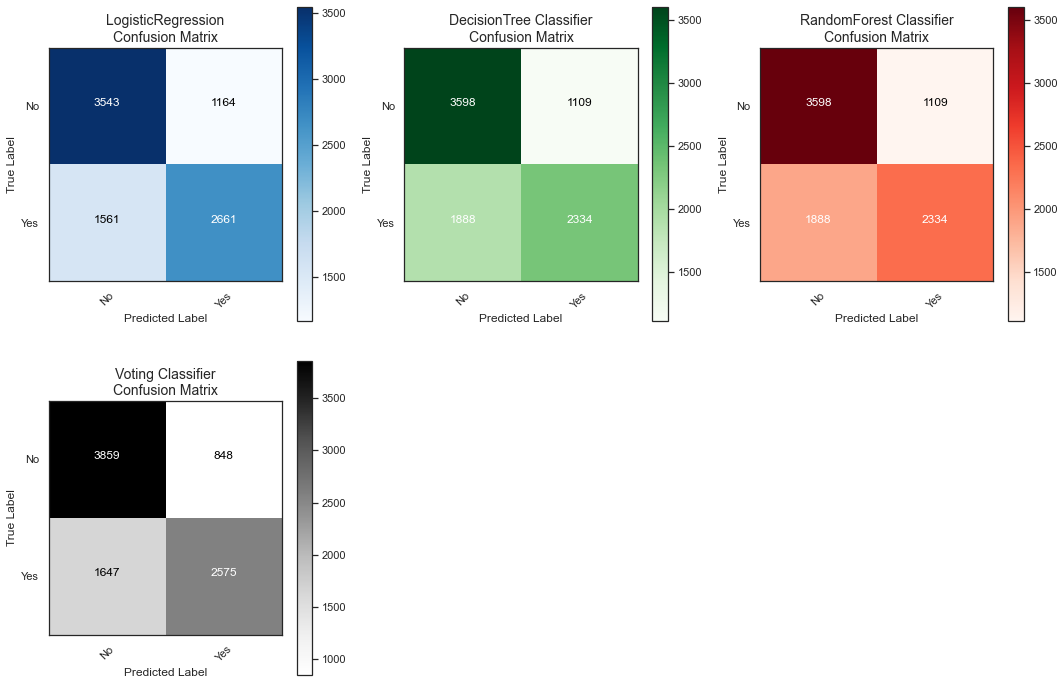

In [47]:
# Definindo parâmetros para plotagem das matrizes
logreg_title = 'LogisticRegression\nConfusion Matrix'
tree_title = 'DecisionTree Classifier\nConfusion Matrix'
forest_title = 'RandomForest Classifier\nConfusion Matrix'
voting_title = 'Voting Classifier\nConfusion Matrix'
classes = ['No', 'Yes']

# Criando figura e chamando função
plt.figure(figsize=(15, 10))

# Regressão Logística
plt.subplot(2, 3, 1)
logreg_tool.plot_confusion_matrix(classes, title=logreg_title)

# Árvore de Decisão
plt.subplot(2, 3, 2)
tree_tool.plot_confusion_matrix(classes, title=tree_title, cmap=plt.cm.Greens)

# Florestas Aleatórias
plt.subplot(2, 3, 3)
tree_tool.plot_confusion_matrix(classes, title=forest_title, cmap=plt.cm.Reds)

# Voting Classifier
plt.subplot(2, 3, 4)
voting_tool.plot_confusion_matrix(classes, title=voting_title, cmap=plt.cm.Greys)

plt.tight_layout()
plt.show()

**Curva ROC**

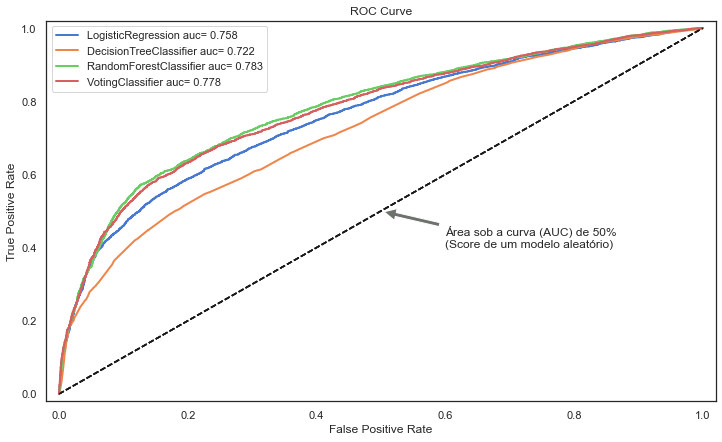

In [48]:
# Criando figura e chamando função pra cada estimator
plt.figure(figsize=(12, 7))

# Plotando curva para os modelos
logreg_tool.plot_roc_curve()
tree_tool.plot_roc_curve()
forest_tool.plot_roc_curve()
voting_tool.plot_roc_curve()

# Anotação
plt.annotate('Área sob a curva (AUC) de 50%\n(Score de um modelo aleatório)', xy=(0.5, 0.5), xytext=(0.6, 0.4),
             arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.show()

**Learning Curve**

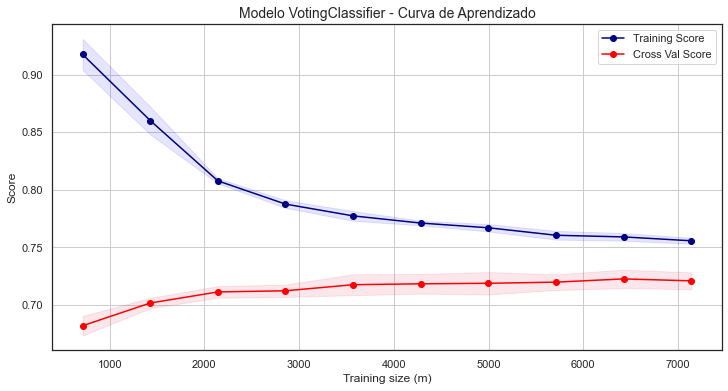

In [49]:
# Plotando curva de aprendizado do modelo
voting_tool.plot_learning_curve()

Analisando os resultados obtidos através de um classificador baseado na votação entre diversos classificadores, é possível perceber que a performance não teve nenhuma melhora significativa. Muito pelo contrário: para grande parte das métricas, o algoritmo `VotingClassifier` apresentou uma performance inferior aos demais classificadores individuais.

Isso pode ser explicado pelo requisito de sucesso exigido por essa abordagem: um set distinto de classificadores que, de preferência, apresentem erros diversos, fazendo assim com que a votação da maioria seja diversa o suficiente para consolidar um valor plausível de predição. Entretanto, esse classificador foi alimentado apenas com dois algoritmos distintos (Regressão Logística e Random Forest), tirando assim a grande vantagem que essa abordagem poderia trazer.

**Avaliando nos dados de teste**

In [50]:
# Visualizando a performance completa do modelo de Regressão Logística
voting_test_performance = voting_tool.evaluate_performance(test=True)
voting_performance = voting_train_performance.reset_index().append(voting_test_performance.reset_index())

all_performances = all_performances.append(voting_performance).reset_index(drop=True)
cm = sns.light_palette('cornflowerblue', as_cmap=True)
all_performances.style.background_gradient(cmap=cm)

,index,approach,acc,precision,recall,f1,auc,total_time
0,LogisticRegression,Train (CV=5),0.6948,0.6958,0.6303,0.6613,0.7581,1.412
1,LogisticRegression,Test Set,0.721,0.744,0.6345,0.6849,0.7581,0.214
2,DecisionTreeClassifier,Train (CV=5),0.6643,0.6817,0.5528,0.6089,0.7225,0.567
3,DecisionTreeClassifier,Test Set,0.6538,0.6248,0.6898,0.6557,0.7225,0.151
4,RandomForestClassifier,Train (CV=5),0.7284,0.7814,0.591,0.6727,0.7832,34.71
5,RandomForestClassifier,Test Set,0.734,0.7997,0.5914,0.68,0.7832,7.969
6,VotingClassifier,Train (CV=5),0.7206,0.7522,0.6099,0.6734,0.7777,35.38
7,VotingClassifier,Test Set,0.7389,0.7888,0.6195,0.694,0.7777,8.666


## Bootstrap Agregating

Enquanto o algoritmo `Voting Classifier` traz uma predição baseada nas predições individuais de um set de distindo de classificadores, o modelo `Bootstrap Agregating` tem como principal funcionalidade a utilização de um **mesmo** algoritmo treinado repetidas vezes como preditores.

Uma vez treinados, o conjunto ensemble realiza predições a partir da agregação das predições de todos os preditores individualmente. Normalmente, a predição final é feita a partir da moda de predições dos preditores, ou seja, a predição mais comum obtida pelos algoritmos do conjunto.

In [51]:
# Instanciando modelo e classe preditiva
bagging_model = BaggingClassifier(
    RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=10, max_features='sqrt', 
                           n_estimators=50, random_state=42), 
    n_estimators=20,
    max_samples=100,
    bootstrap=True,
    n_jobs=-1,
    oob_score=True
)

# Treinando modelo
bagging_tool = BinaryBaselineClassifier(bagging_model, set_prep, model_features)
bagging_tool.fit(rnd_search=False)

Treinando modelo BaggingClassifier.
Treinamento finalizado com sucesso! Configurações do modelo: 

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=False,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=10,
                                                        max_features='sqrt',
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                    

**Métricas do modelo**

In [52]:
# Verificando performance
bagging_train_performance = bagging_tool.evaluate_performance()
bagging_train_performance

,approach,acc,precision,recall,f1,auc,total_time
BaggingClassifier,Train (CV=5),0.7025,0.7298,0.5952,0.6547,0.7631,896.786


**Matriz de confusão**

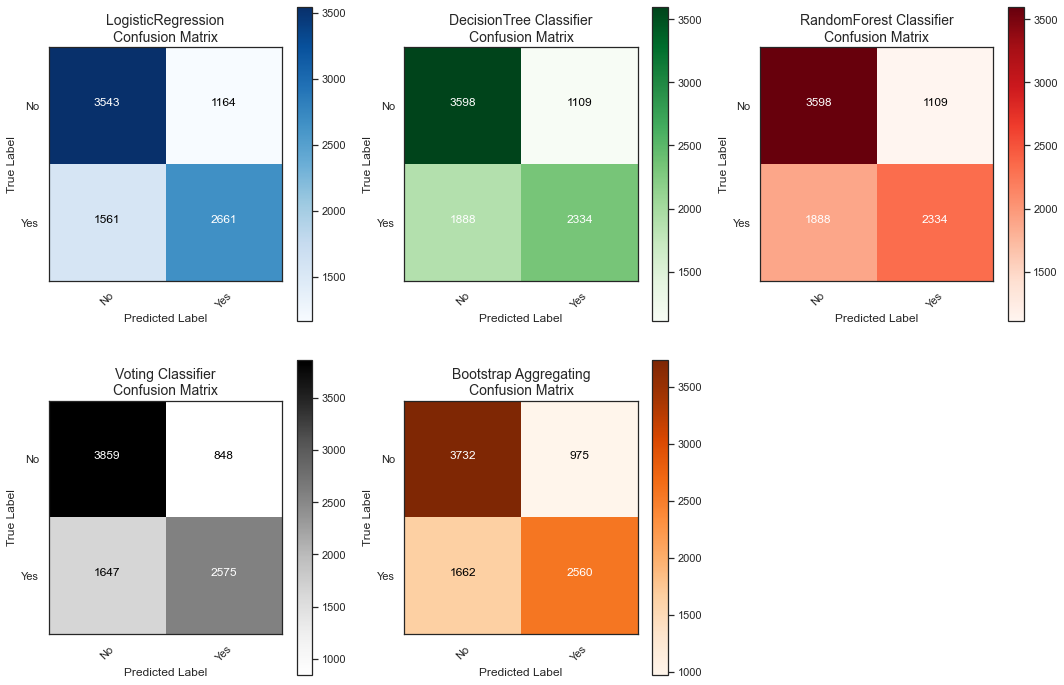

In [53]:
# Definindo parâmetros para plotagem das matrizes
logreg_title = 'LogisticRegression\nConfusion Matrix'
tree_title = 'DecisionTree Classifier\nConfusion Matrix'
forest_title = 'RandomForest Classifier\nConfusion Matrix'
voting_title = 'Voting Classifier\nConfusion Matrix'
bagging_title = 'Bootstrap Aggregating\nConfusion Matrix'
classes = ['No', 'Yes']

# Criando figura e chamando função
plt.figure(figsize=(15, 10))

# Regressão Logística
plt.subplot(2, 3, 1)
logreg_tool.plot_confusion_matrix(classes, title=logreg_title)

# Árvore de Decisão
plt.subplot(2, 3, 2)
tree_tool.plot_confusion_matrix(classes, title=tree_title, cmap=plt.cm.Greens)

# Florestas Aleatórias
plt.subplot(2, 3, 3)
tree_tool.plot_confusion_matrix(classes, title=forest_title, cmap=plt.cm.Reds)

# Voting Classifier
plt.subplot(2, 3, 4)
voting_tool.plot_confusion_matrix(classes, title=voting_title, cmap=plt.cm.Greys)

# Bagging Classifier
plt.subplot(2, 3, 5)
bagging_tool.plot_confusion_matrix(classes, title=bagging_title, cmap=plt.cm.Oranges)

plt.tight_layout()
plt.show()

**Curva ROC**

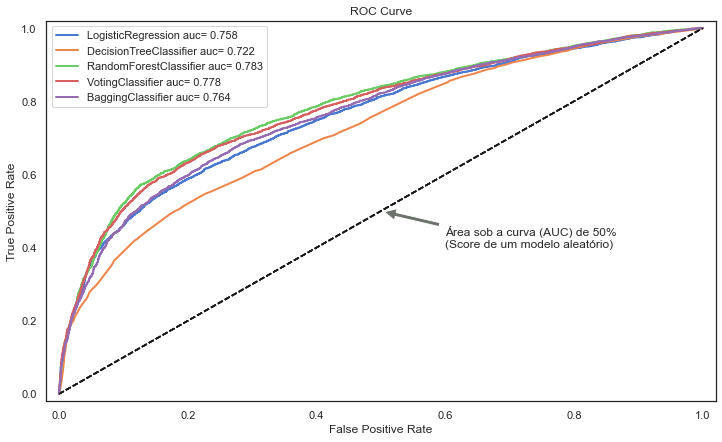

In [54]:
# Criando figura e chamando função pra cada estimator
plt.figure(figsize=(12, 7))

# Plotando curva para os modelos
logreg_tool.plot_roc_curve()
tree_tool.plot_roc_curve()
forest_tool.plot_roc_curve()
voting_tool.plot_roc_curve()
bagging_tool.plot_roc_curve()

# Anotação
plt.annotate('Área sob a curva (AUC) de 50%\n(Score de um modelo aleatório)', xy=(0.5, 0.5), xytext=(0.6, 0.4),
             arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.show()

**Learning Curve**

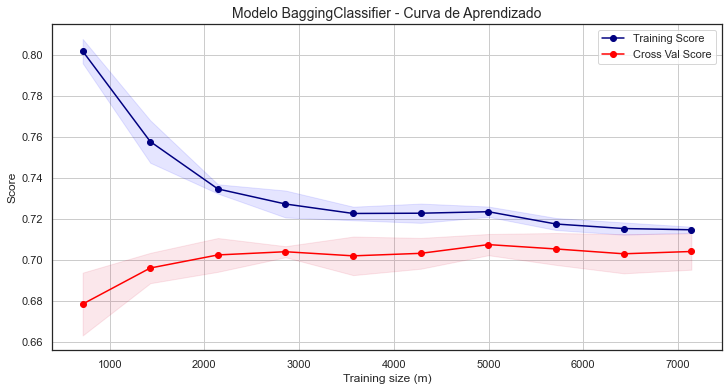

In [55]:
# Plotando curva de aprendizado do modelo
bagging_tool.plot_learning_curve()

No algoritmo Bootstrap Agregating, foi utilizado o algoritmo Random Forest como preditor (foram utilizados 100 preditores para o modelo final), porém a performance obtida não foi satisfatória do modo esperado. Além dos valores abaixo do preditor individual em relação as métricas, o tempo de processamento para a validação dos resultados foi extremamente elevado, tanto em validação cruzada quanto para os dados de teste.

**Avaliando nos dados de teste**

In [56]:
# Visualizando a performance completa do modelo de Regressão Logística
bagging_test_performance = bagging_tool.evaluate_performance(test=True)
bagging_performance = bagging_train_performance.reset_index().append(bagging_test_performance.reset_index())

all_performances = all_performances.append(bagging_performance).reset_index(drop=True)
cm = sns.light_palette('cornflowerblue', as_cmap=True)
all_performances.style.background_gradient(cmap=cm)

,index,approach,acc,precision,recall,f1,auc,total_time
0,LogisticRegression,Train (CV=5),0.6948,0.6958,0.6303,0.6613,0.7581,1.412
1,LogisticRegression,Test Set,0.721,0.744,0.6345,0.6849,0.7581,0.214
2,DecisionTreeClassifier,Train (CV=5),0.6643,0.6817,0.5528,0.6089,0.7225,0.567
3,DecisionTreeClassifier,Test Set,0.6538,0.6248,0.6898,0.6557,0.7225,0.151
4,RandomForestClassifier,Train (CV=5),0.7284,0.7814,0.591,0.6727,0.7832,34.71
5,RandomForestClassifier,Test Set,0.734,0.7997,0.5914,0.68,0.7832,7.969
6,VotingClassifier,Train (CV=5),0.7206,0.7522,0.6099,0.6734,0.7777,35.38
7,VotingClassifier,Test Set,0.7389,0.7888,0.6195,0.694,0.7777,8.666
8,BaggingClassifier,Train (CV=5),0.7025,0.7298,0.5952,0.6547,0.7631,896.786
9,BaggingClassifier,Test Set,0.7156,0.7565,0.597,0.6674,0.7621,210.999


## Adaptative Boosting

Em resumo, o algoritmo `AdaBoost` (Adaptative Boosting) é uma forma de treinar diversos classificadores capazes de corrigir os erros de seus antecessores.

Por exemplo, um primeiro classificador é treinado e utilizado para as predições no próprio set de treinamento. O peso relativo das instâncias classificadas erroneamente são então aprimorados. Um segundo classificador é treinado utilizando os pesos atualizados dessas instâncias e, novamente, utilizado para predições no set de treinamento, gerando novos erros e novas atualizações nos pesos. 

E assim, cada classificador que entrar no pacote irá considerar os pesos atualizados de acordo com os erros cometidos pelos classificadores anteriores.

In [59]:
# Instanciando modelo e classe preditiva
adaboost_model = AdaBoostClassifier(
    RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=10, max_features='sqrt', 
                           n_estimators=50, random_state=42), 
    n_estimators=20,
    learning_rate=0.5,
    random_state=42
)

# Treinando modelo
adaboost_tool = BinaryBaselineClassifier(adaboost_model, set_prep, model_features)
adaboost_tool.fit(rnd_search=False)

Treinando modelo AdaBoostClassifier.
Treinamento finalizado com sucesso! Configurações do modelo: 

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=False,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=10,
                                                         max_features='sqrt',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,


**Métricas do modelo**

In [60]:
# Verificando performance
adaboost_train_performance = adaboost_tool.evaluate_performance()
adaboost_train_performance

,approach,acc,precision,recall,f1,auc,total_time
AdaBoostClassifier,Train (CV=5),0.736,0.7679,0.6334,0.6939,0.7886,277.196


**Matriz de confusão**

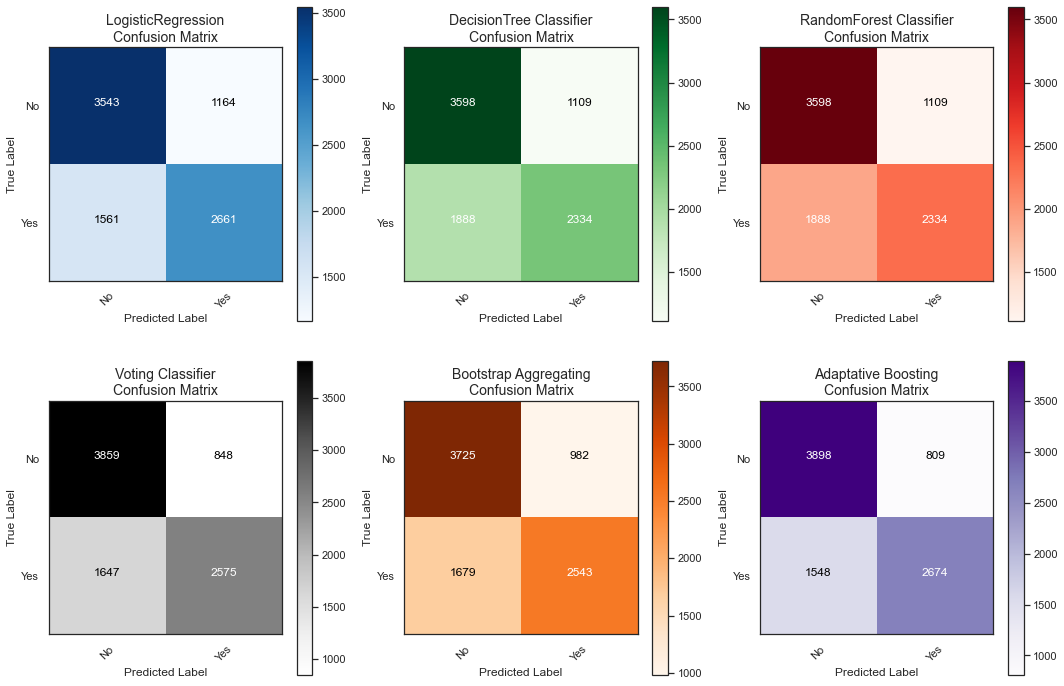

In [61]:
# Definindo parâmetros para plotagem das matrizes
logreg_title = 'LogisticRegression\nConfusion Matrix'
tree_title = 'DecisionTree Classifier\nConfusion Matrix'
forest_title = 'RandomForest Classifier\nConfusion Matrix'
voting_title = 'Voting Classifier\nConfusion Matrix'
bagging_title = 'Bootstrap Aggregating\nConfusion Matrix'
adaboost_title = 'Adaptative Boosting\nConfusion Matrix'
classes = ['No', 'Yes']

# Criando figura e chamando função
plt.figure(figsize=(15, 10))

# Regressão Logística
plt.subplot(2, 3, 1)
logreg_tool.plot_confusion_matrix(classes, title=logreg_title)

# Árvore de Decisão
plt.subplot(2, 3, 2)
tree_tool.plot_confusion_matrix(classes, title=tree_title, cmap=plt.cm.Greens)

# Florestas Aleatórias
plt.subplot(2, 3, 3)
tree_tool.plot_confusion_matrix(classes, title=forest_title, cmap=plt.cm.Reds)

# Voting Classifier
plt.subplot(2, 3, 4)
voting_tool.plot_confusion_matrix(classes, title=voting_title, cmap=plt.cm.Greys)

# Bagging Classifier
plt.subplot(2, 3, 5)
bagging_tool.plot_confusion_matrix(classes, title=bagging_title, cmap=plt.cm.Oranges)

# Adaboost Classifier
plt.subplot(2, 3, 6)
adaboost_tool.plot_confusion_matrix(classes, title=adaboost_title, cmap=plt.cm.Purples)

plt.tight_layout()
plt.show()

**Curva ROC**

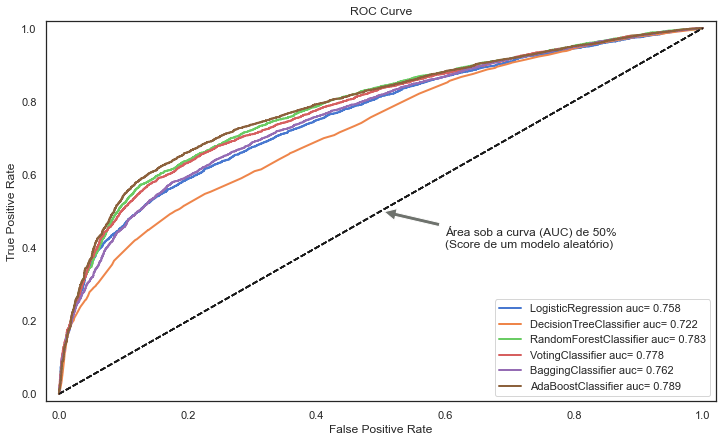

In [62]:
# Criando figura e chamando função pra cada estimator
plt.figure(figsize=(12, 7))

# Plotando curva para os modelos
logreg_tool.plot_roc_curve()
tree_tool.plot_roc_curve()
forest_tool.plot_roc_curve()
voting_tool.plot_roc_curve()
bagging_tool.plot_roc_curve()
adaboost_tool.plot_roc_curve()

# Anotação
plt.annotate('Área sob a curva (AUC) de 50%\n(Score de um modelo aleatório)', xy=(0.5, 0.5), xytext=(0.6, 0.4),
             arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.show()

**Learning Curve**

In [ ]:
# Plotando curva de aprendizado do modelo
adaboost_tool.plot_learning_curve()

Mais uma vez, a performance de um modelo `ensemble` utilizando o algoritmo de DecisionTrees como base não obteve uma performance satisfatória. Analisando a curva de aprendizado do algoritmo `AdaBoost`, é possível perceber um grande viés presente, sendo este representado pelo grande espaçamento entre a métrica obtida apenas nos dados de treino e a métrica obtida utilizando validação cruzada.

**Avaliando nos dados de teste**

In [64]:
# Visualizando a performance completa do modelo de Regressão Logística
adaboost_test_performance = adaboost_tool.evaluate_performance(test=True)
adaboost_performance = adaboost_train_performance.reset_index().append(adaboost_test_performance.reset_index())

all_performances = all_performances.append(adaboost_performance).reset_index(drop=True)
cm = sns.light_palette('cornflowerblue', as_cmap=True)
all_performances.style.background_gradient(cmap=cm)

,index,approach,acc,precision,recall,f1,auc,total_time
0,LogisticRegression,Train (CV=5),0.6948,0.6958,0.6303,0.6613,0.7581,1.412
1,LogisticRegression,Test Set,0.721,0.744,0.6345,0.6849,0.7581,0.214
2,DecisionTreeClassifier,Train (CV=5),0.6643,0.6817,0.5528,0.6089,0.7225,0.567
3,DecisionTreeClassifier,Test Set,0.6538,0.6248,0.6898,0.6557,0.7225,0.151
4,RandomForestClassifier,Train (CV=5),0.7284,0.7814,0.591,0.6727,0.7832,34.71
5,RandomForestClassifier,Test Set,0.734,0.7997,0.5914,0.68,0.7832,7.969
6,VotingClassifier,Train (CV=5),0.7206,0.7522,0.6099,0.6734,0.7777,35.38
7,VotingClassifier,Test Set,0.7389,0.7888,0.6195,0.694,0.7777,8.666
8,BaggingClassifier,Train (CV=5),0.7025,0.7298,0.5952,0.6547,0.7631,896.786
9,BaggingClassifier,Test Set,0.7156,0.7565,0.597,0.6674,0.7621,210.999


## Gradient Boosting

Assim como foi visto no algoritmo AdaBoost, o `Gradient Boosting` também trabalha sequencialmente na adição de preditores em um conjunto, cada qual corrigindo o antecessor. Entretanto, ao invés de modificar os pesos de instâncias classificadas erroneamente (como faz o AdaBoost), o Gradient Boosting treina o próximo modelo utilizando os erros residuais do antecessor.

In [65]:
# Instanciando modelo e classe preditiva
gboost_model = GradientBoostingClassifier(
    n_estimators=20,
    learning_rate=1.0,
    max_depth=5, 
    max_features=15,
    random_state=42
)

# Treinando modelo
gboost_tool = BinaryBaselineClassifier(gboost_model, set_prep, model_features)
gboost_tool.fit(rnd_search=False)

Treinando modelo GradientBoostingClassifier.
Treinamento finalizado com sucesso! Configurações do modelo: 

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=5,
                           max_features=15, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


**Métricas do modelo**

In [66]:
# Verificando performance
gboost_train_performance = gboost_tool.evaluate_performance()
gboost_train_performance

,approach,acc,precision,recall,f1,auc,total_time
GradientBoostingClassifier,Train (CV=5),0.7075,0.7207,0.6227,0.6681,0.7543,5.33


**Matriz de confusão**

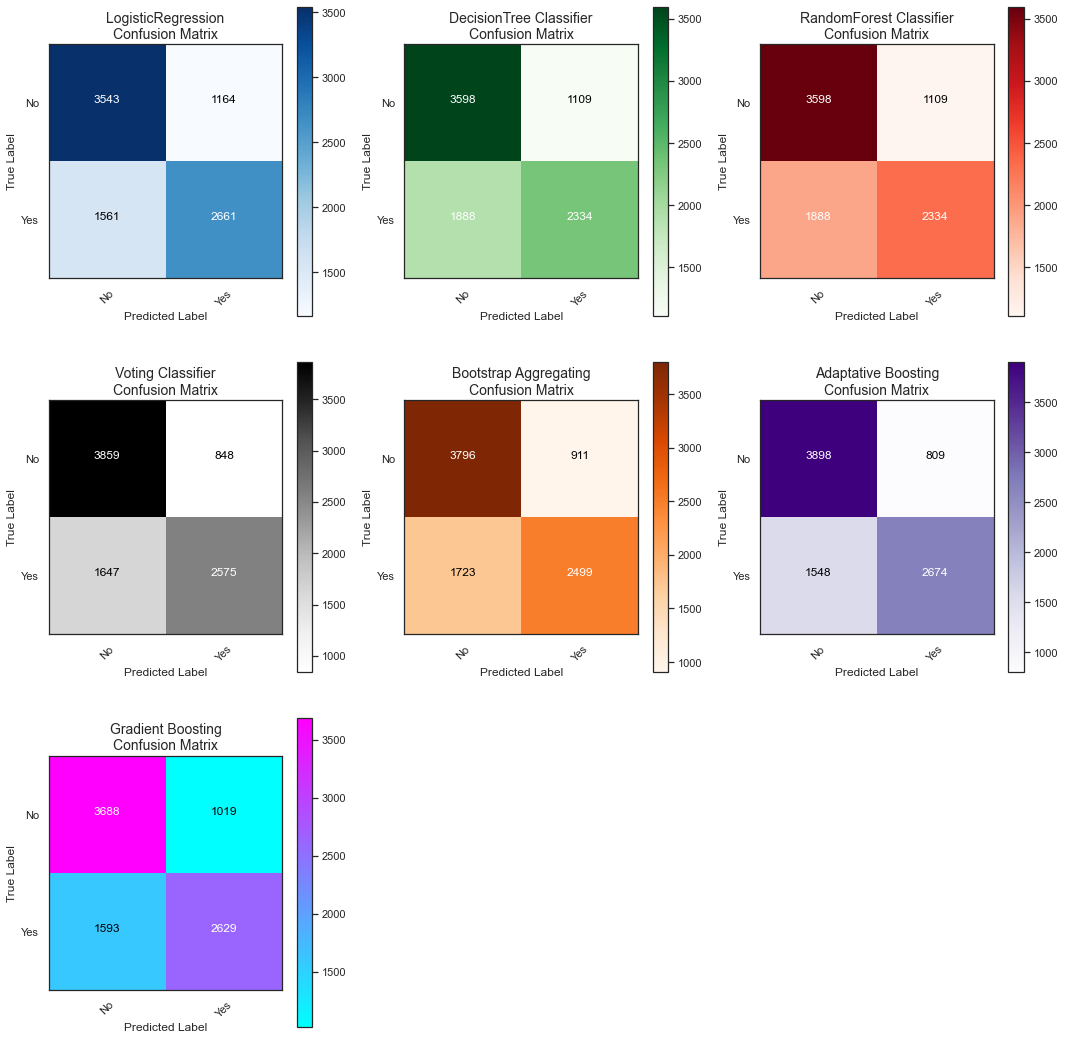

In [67]:
# Definindo parâmetros para plotagem das matrizes
logreg_title = 'LogisticRegression\nConfusion Matrix'
tree_title = 'DecisionTree Classifier\nConfusion Matrix'
forest_title = 'RandomForest Classifier\nConfusion Matrix'
voting_title = 'Voting Classifier\nConfusion Matrix'
bagging_title = 'Bootstrap Aggregating\nConfusion Matrix'
adaboost_title = 'Adaptative Boosting\nConfusion Matrix'
gboost_title = 'Gradient Boosting\nConfusion Matrix'
classes = ['No', 'Yes']

# Criando figura e chamando função
plt.figure(figsize=(15, 15))

# Regressão Logística
plt.subplot(3, 3, 1)
logreg_tool.plot_confusion_matrix(classes, title=logreg_title)

# Árvore de Decisão
plt.subplot(3, 3, 2)
tree_tool.plot_confusion_matrix(classes, title=tree_title, cmap=plt.cm.Greens)

# Florestas Aleatórias
plt.subplot(3, 3, 3)
tree_tool.plot_confusion_matrix(classes, title=forest_title, cmap=plt.cm.Reds)

# Voting Classifier
plt.subplot(3, 3, 4)
voting_tool.plot_confusion_matrix(classes, title=voting_title, cmap=plt.cm.Greys)

# Bagging Classifier
plt.subplot(3, 3, 5)
bagging_tool.plot_confusion_matrix(classes, title=bagging_title, cmap=plt.cm.Oranges)

# Adaboost Classifier
plt.subplot(3, 3, 6)
adaboost_tool.plot_confusion_matrix(classes, title=adaboost_title, cmap=plt.cm.Purples)

# Gradient Boosting
plt.subplot(3, 3, 7)
gboost_tool.plot_confusion_matrix(classes, title=gboost_title, cmap=plt.cm.cool)

plt.tight_layout()
plt.show()

**Curva ROC**

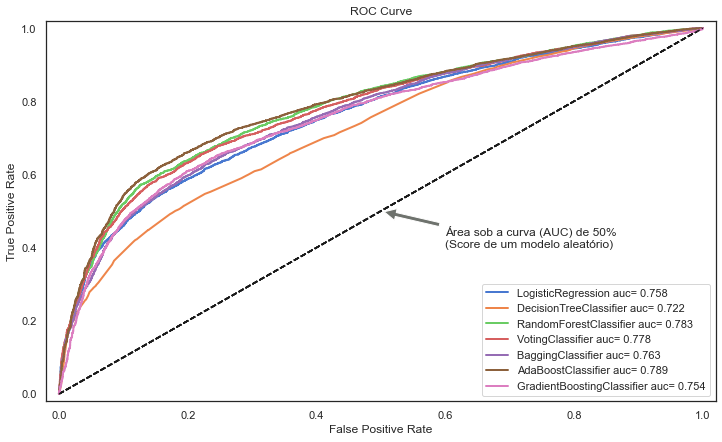

In [68]:
# Criando figura e chamando função pra cada estimator
plt.figure(figsize=(12, 7))

# Plotando curva para os modelos
logreg_tool.plot_roc_curve()
tree_tool.plot_roc_curve()
forest_tool.plot_roc_curve()
voting_tool.plot_roc_curve()
bagging_tool.plot_roc_curve()
adaboost_tool.plot_roc_curve()
gboost_tool.plot_roc_curve()

# Anotação
plt.annotate('Área sob a curva (AUC) de 50%\n(Score de um modelo aleatório)', xy=(0.5, 0.5), xytext=(0.6, 0.4),
             arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.show()

**Learning Curve**

In [ ]:
# Plotando curva de aprendizado do modelo
gboost_tool.plot_learning_curve()

Observando a performance da abordagem por Bootstrap Aggregating, é possível perceber a superioridade em relação ao algoritmo individual de Árvore de Decisão. Entretanto, em termos gerais, essa abordagem não apresentou performance satisfatória em relação aos demais algoritmos treinados.

Isso pode ser explicado pelo fato do algoritmo de Árvore de Decisão ter sido o de menor performance entre todos. Como o conceitod e Bagging envolve as predições de um único preditor, utilizar o modelo de árvore não foi uma boa generalização em busca da melhor performance dentro deste contexto.

Além disso, um ponto considerável a ser citado é o tempo de avaliação do modelo, sendo este o mais demorado entre todos (afinal, está sendo utilizado um set de 500 preditores DecisionTrees!)

**Avaliando nos dados de teste**

In [69]:
# Visualizando a performance completa do modelo de Regressão Logística
gboost_test_performance = gboost_tool.evaluate_performance(test=True)
gboost_performance = gboost_train_performance.reset_index().append(gboost_test_performance.reset_index())

all_performances = all_performances.append(gboost_performance).reset_index(drop=True)
cm = sns.light_palette('cornflowerblue', as_cmap=True)
all_performances.style.background_gradient(cmap=cm)

,index,approach,acc,precision,recall,f1,auc,total_time
0,LogisticRegression,Train (CV=5),0.6948,0.6958,0.6303,0.6613,0.7581,1.412
1,LogisticRegression,Test Set,0.721,0.744,0.6345,0.6849,0.7581,0.214
2,DecisionTreeClassifier,Train (CV=5),0.6643,0.6817,0.5528,0.6089,0.7225,0.567
3,DecisionTreeClassifier,Test Set,0.6538,0.6248,0.6898,0.6557,0.7225,0.151
4,RandomForestClassifier,Train (CV=5),0.7284,0.7814,0.591,0.6727,0.7832,34.71
5,RandomForestClassifier,Test Set,0.734,0.7997,0.5914,0.68,0.7832,7.969
6,VotingClassifier,Train (CV=5),0.7206,0.7522,0.6099,0.6734,0.7777,35.38
7,VotingClassifier,Test Set,0.7389,0.7888,0.6195,0.694,0.7777,8.666
8,BaggingClassifier,Train (CV=5),0.7025,0.7298,0.5952,0.6547,0.7631,896.786
9,BaggingClassifier,Test Set,0.7156,0.7565,0.597,0.6674,0.7621,210.999


## LightGBM

In [71]:
# Criando datasets para o modelo LightGBM
train_data = lgb.Dataset(X_train_prep, label=y_train)
test_data = lgb.Dataset(X_test_prep, label=y_test)

# Parâmetros
lgbm_params = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}
lgbm_model = lgb.LGBMClassifier(**lgbm_params)

In [72]:
# Instanciando classe para visualizar resultado
lgbm_tool = BinaryBaselineClassifier(lgbm_model, set_prep, model_features)
lgbm_tool.fit(rnd_search=False)

Treinando modelo LGBMClassifier.
Treinamento finalizado com sucesso! Configurações do modelo: 

LGBMClassifier(application='binary', bagging_fraction=0.5, bagging_freq=20,
               boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               feature_fraction=0.5, importance_type='split',
               is_unbalance='true', learning_rate=0.05, max_depth=-1,
               metric='auc', min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective='binary', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0, verbose=0)


**Métricas do modelo**

In [73]:
# Verificando performance
lgbm_train_performance = lgbm_tool.evaluate_performance()
lgbm_train_performance

,approach,acc,precision,recall,f1,auc,total_time
LGBMClassifier,Train (CV=5),0.7282,0.7397,0.6563,0.6953,0.7863,5.779


**Matriz de confusão**

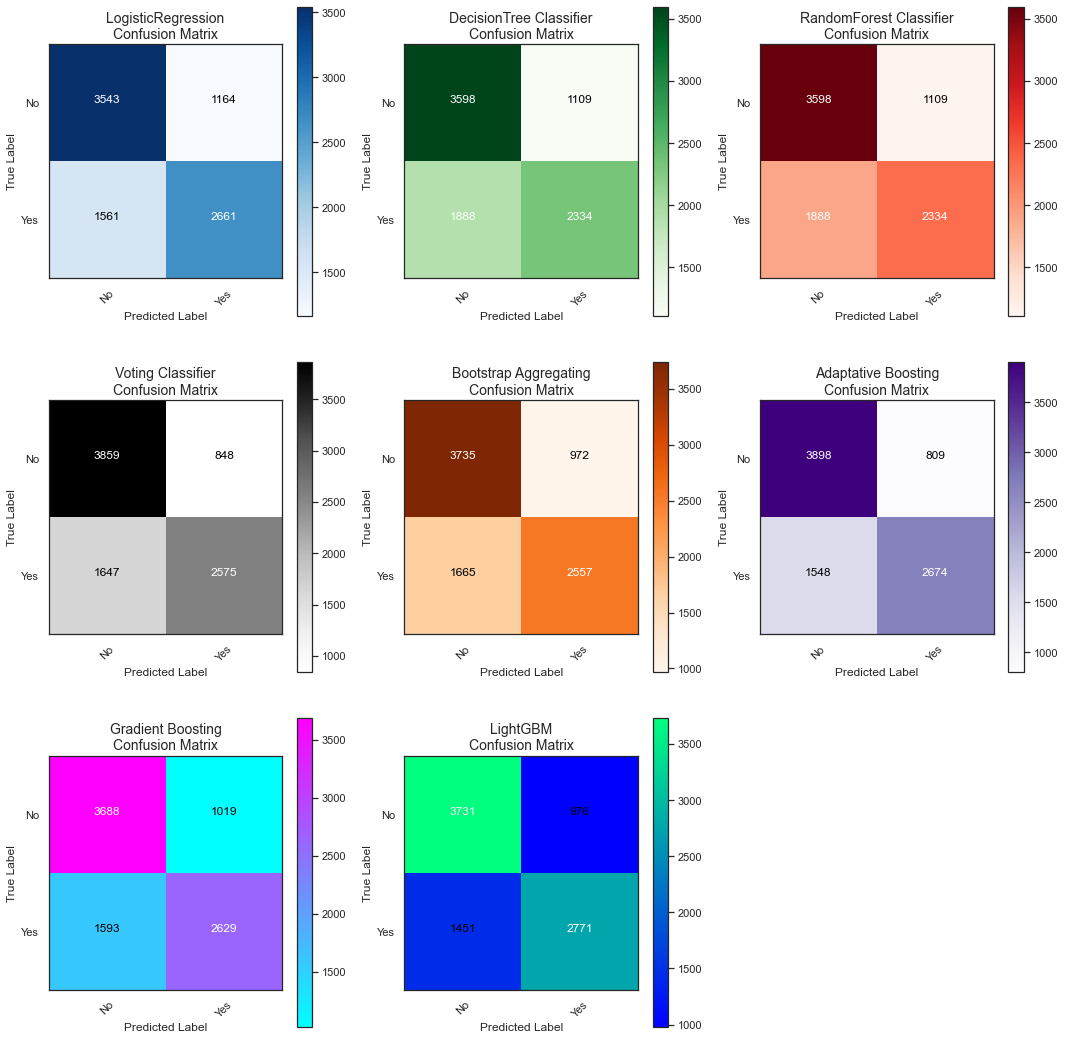

In [74]:
# Definindo parâmetros para plotagem das matrizes
logreg_title = 'LogisticRegression\nConfusion Matrix'
tree_title = 'DecisionTree Classifier\nConfusion Matrix'
forest_title = 'RandomForest Classifier\nConfusion Matrix'
voting_title = 'Voting Classifier\nConfusion Matrix'
bagging_title = 'Bootstrap Aggregating\nConfusion Matrix'
adaboost_title = 'Adaptative Boosting\nConfusion Matrix'
gboost_title = 'Gradient Boosting\nConfusion Matrix'
lgbm_title = 'LightGBM\nConfusion Matrix'
classes = ['No', 'Yes']

# Criando figura e chamando função
plt.figure(figsize=(15, 15))

# Regressão Logística
plt.subplot(3, 3, 1)
logreg_tool.plot_confusion_matrix(classes, title=logreg_title)

# Árvore de Decisão
plt.subplot(3, 3, 2)
tree_tool.plot_confusion_matrix(classes, title=tree_title, cmap=plt.cm.Greens)

# Florestas Aleatórias
plt.subplot(3, 3, 3)
tree_tool.plot_confusion_matrix(classes, title=forest_title, cmap=plt.cm.Reds)

# Voting Classifier
plt.subplot(3, 3, 4)
voting_tool.plot_confusion_matrix(classes, title=voting_title, cmap=plt.cm.Greys)

# Bagging Classifier
plt.subplot(3, 3, 5)
bagging_tool.plot_confusion_matrix(classes, title=bagging_title, cmap=plt.cm.Oranges)

# Adaboost Classifier
plt.subplot(3, 3, 6)
adaboost_tool.plot_confusion_matrix(classes, title=adaboost_title, cmap=plt.cm.Purples)

# Gradient Boosting
plt.subplot(3, 3, 7)
gboost_tool.plot_confusion_matrix(classes, title=gboost_title, cmap=plt.cm.cool)

# Gradient Boosting
plt.subplot(3, 3, 8)
lgbm_tool.plot_confusion_matrix(classes, title=lgbm_title, cmap=plt.cm.winter)

plt.tight_layout()
plt.show()

**Curva ROC**

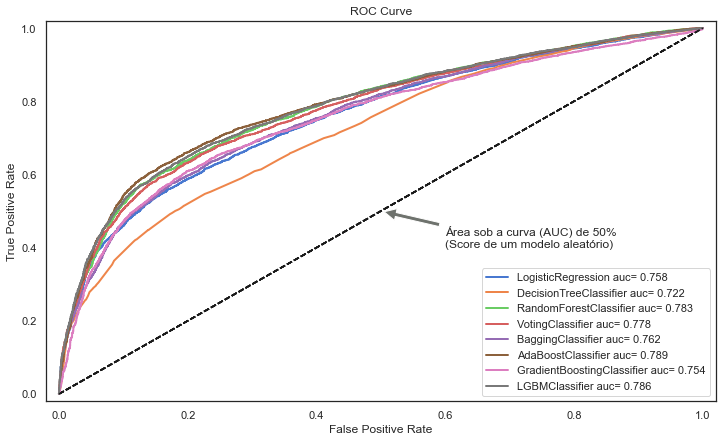

In [75]:
# Criando figura e chamando função pra cada estimator
plt.figure(figsize=(12, 7))

# Plotando curva para os modelos
logreg_tool.plot_roc_curve()
tree_tool.plot_roc_curve()
forest_tool.plot_roc_curve()
voting_tool.plot_roc_curve()
bagging_tool.plot_roc_curve()
adaboost_tool.plot_roc_curve()
gboost_tool.plot_roc_curve()
lgbm_tool.plot_roc_curve()

# Anotação
plt.annotate('Área sob a curva (AUC) de 50%\n(Score de um modelo aleatório)', xy=(0.5, 0.5), xytext=(0.6, 0.4),
             arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.show()

**Learning Curve**

In [ ]:
# Plotando curva de aprendizado do modelo
lgbm_tool.plot_learning_curve()

**Avaliando nos dados de teste**

In [76]:
# Visualizando a performance completa do modelo de Regressão Logística
lgbm_test_performance = lgbm_tool.evaluate_performance(test=True)
lgbm_performance = lgbm_train_performance.reset_index().append(lgbm_test_performance.reset_index())

all_performances = all_performances.append(lgbm_performance).reset_index(drop=True)
cm = sns.light_palette('cornflowerblue', as_cmap=True)
all_performances.style.background_gradient(cmap=cm)

,index,approach,acc,precision,recall,f1,auc,total_time
0,LogisticRegression,Train (CV=5),0.6948,0.6958,0.6303,0.6613,0.7581,1.412
1,LogisticRegression,Test Set,0.721,0.744,0.6345,0.6849,0.7581,0.214
2,DecisionTreeClassifier,Train (CV=5),0.6643,0.6817,0.5528,0.6089,0.7225,0.567
3,DecisionTreeClassifier,Test Set,0.6538,0.6248,0.6898,0.6557,0.7225,0.151
4,RandomForestClassifier,Train (CV=5),0.7284,0.7814,0.591,0.6727,0.7832,34.71
5,RandomForestClassifier,Test Set,0.734,0.7997,0.5914,0.68,0.7832,7.969
6,VotingClassifier,Train (CV=5),0.7206,0.7522,0.6099,0.6734,0.7777,35.38
7,VotingClassifier,Test Set,0.7389,0.7888,0.6195,0.694,0.7777,8.666
8,BaggingClassifier,Train (CV=5),0.7025,0.7298,0.5952,0.6547,0.7631,896.786
9,BaggingClassifier,Test Set,0.7156,0.7565,0.597,0.6674,0.7621,210.999


# Deep Neural Network

Em uma tentativa mais ousada, vamos aplicar alguns conceitos de Redes Neurais Profundas para verificar se a performance de um classificador para este problema de negócio pode ser aprimorado com este tipo de abordagem.

In [24]:
# Função para reset do grafo
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [31]:
# Transformando tipos primitivos dos dados para input correto na rede
X_train_prep = X_train_prep.astype('float32')
y_train = y_train.astype('int32')
X_test_prep = X_test_prep.astype('float32')
y_test = y_test.astype('int32')

## Construction Phase

In [68]:
# Variáveis para salvamento do modelo
now = datetime.now().strftime('%Y%m%d_%H%M%S')
root_logdir = 'tf_logs'
logdir = f'{root_logdir}/run_{now}'

# ----------------------------
# ---- CONSTRUCTION PHASE ----
# ----------------------------

# Definindo variáveis da rede
n_inputs = X_train_prep.shape[1]
classes = np.unique(y_train)
n_hidden1 = 100
n_hidden2 = 50
n_hidden3 = 10
n_hidden4 = 5
n_outputs = len(classes)

# Definindo placeholders para os inputs
reset_graph()
with tf.name_scope('inputs'):
    X = tf.placeholder(tf.float32, shape=(None, n_inputs), name='X')
    y = tf.placeholder(tf.int32, shape=(None), name='y')
    
# Construindo as camadas da rede
with tf.name_scope('dnn'):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name='hidden1')
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu, name='hidden2')
    hidden3 = tf.layers.dense(hidden2, n_hidden3, activation=tf.nn.relu, name='hidden3')
    hidden4 = tf.layers.dense(hidden3, n_hidden4, activation=tf.nn.relu, name='hidden4')
    logits = tf.layers.dense(hidden4, n_outputs, name='outputs')
    
# Definindo função custo
with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name='loss')
    
# Definindo otimizador
with tf.name_scope('train'):
    optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
    training_op = optimizer.minimize(loss)
    
# Avaliando performance (acurácia)
with tf.name_scope('accuracy'):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name='accuracy')
    
"""# Avaliando performance (AUC)
with tf.name_scope('auc'):
    auc = tf.keras.metrics.AUC(y_proba, correct)"""
    
# Nós de inicialização e salvamento da rede
init = tf.global_variables_initializer()
saver = tf.train.Saver()

# Parâmetros para visualização no TensorBoard
loss_summary = tf.summary.scalar('loss', loss)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

## Execution Phase

Antes de iniciar a fase de execução da rede, é preciso definir uma função para leitura dos mini-batches do conjunto de dados a serem utilizados no treinamento (Mini Batch Gradient Descent).

In [33]:
# Definindo função para leitura de dados em mini-batches
def fetch_batch(X, y, epoch, batch_index, batch_size):
    """
    Etapas:
        1. leitura do conjunto de dados em diferentes mini-batches
        
    Argumentos:
        epoch -- época do treinamento do algoritmo
        batch_index -- índice do mini-batch a ser lido do conjunto total
        batch_size -- tamanho do mini-batch em termos de número de registros
        
    Retorno:
        X_batch, y_batch -- conjuntos mini-batch de dados lidos a partir do conjunto total
    """
    
    # Retornando parâmetros
    m = X.shape[0]
    n_batches = m // batch_size
    
    # Definindo semente aleatória
    np.random.seed(epoch * n_batches + batch_index)
    
    # Indexando mini-batches do conjunto total
    indices = np.random.randint(m, size=batch_size)
    X_batch = X[indices]
    y_batch = y[indices]
    
    return X_batch, y_batch

Além disso, vamos criar algumas variáveis importantes para visualizar o modelo no TensorBoard

Epoch: 0, Train accuracy: 0.6719, Test accuracy: 0.721
Epoch: 5, Train accuracy: 0.7344, Test accuracy: 0.7313
Epoch: 10, Train accuracy: 0.7812, Test accuracy: 0.7335
Epoch: 15, Train accuracy: 0.8359, Test accuracy: 0.7125
Epoch: 20, Train accuracy: 0.8516, Test accuracy: 0.7026
Epoch: 25, Train accuracy: 0.8594, Test accuracy: 0.6968
Epoch: 30, Train accuracy: 0.8125, Test accuracy: 0.6852
Epoch: 35, Train accuracy: 0.8516, Test accuracy: 0.7049
Epoch: 40, Train accuracy: 0.9297, Test accuracy: 0.6771
Epoch: 45, Train accuracy: 0.8828, Test accuracy: 0.6959


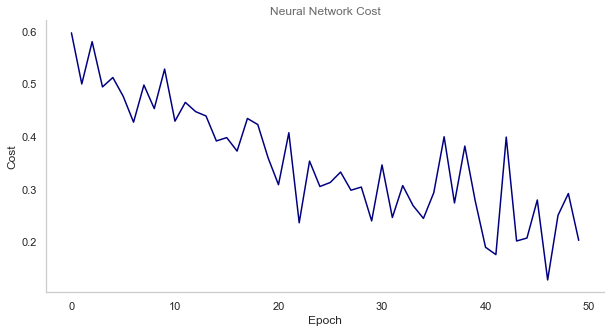

In [69]:
# -------------------------
# ---- EXECUTION PHASE ----
# -------------------------

# Variáveis importantes para o treinamento
m_train = X_train_prep.shape[0]
n_epochs = 50
batch_size = 128
n_batches = m_train // batch_size
costs = []

# Inicializando sessão
with tf.Session() as sess:
    
    # Inicializando variáveis globais
    init.run()
    
    # Iterando sobre as épocas de treino
    for epoch in range(n_epochs):
        # Iterando sobre cada mini-batch
        for batch in range(n_batches):
            X_batch, y_batch = fetch_batch(X_train_prep, y_train, epoch, batch, batch_size)
            batch_feed_dict = {X: X_batch, y: y_batch}
            
            # Salvando status do modelo a cada T mini-batches
            if batch % 10 == 0:
                summary_loss_str = loss_summary.eval(feed_dict=batch_feed_dict)
                step = epoch * n_batches + batch
                file_writer.add_summary(summary_loss_str, step)
                
            # Inicializando treinamento com cada mini-batch
            sess.run(training_op, feed_dict=batch_feed_dict)
            
        # Métricas de performance a cada N épocas
        test_feed_dict = {X: X_test_prep, y: y_test}
        if epoch % 5 == 0:
            # Acurácia
            acc_train = accuracy.eval(feed_dict=batch_feed_dict)
            acc_test = accuracy.eval(feed_dict=test_feed_dict)
            print(f'Epoch: {epoch}, Train accuracy: {round(float(acc_train), 4)}, \
Test accuracy: {round(float(acc_test), 4)}')
            
            # AUC
            """train_proba = y_proba.eval(feed_dict=batch_feed_dict)
            class_indices = np.argmax(train_proba, axis=1)
            train_pred = np.array([[classes[class_idx]] for class_idx in class_indices], np.int32)
            tf.local_variables_initializer().run()
            auc_train = sess.run(auc(y_batch.reshape(-1, 1), train_pred))
            print(f'AUC: {auc_train}')"""
            
        # Custo do modelo
        cost = loss.eval(feed_dict=batch_feed_dict)
        costs.append(cost)
        
    # Finalizando FileWriter
    file_writer.close()
    
# Plotando custo
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(np.squeeze(costs), color='navy')
format_spines(ax, right_border=False)
ax.set_title('Neural Network Cost', color='dimgrey')
ax.set_xlabel('Epoch')
ax.set_ylabel('Cost')
plt.show()

Exemplo utilizando o Keras:

    # Definindo um modelo utilizando o Keras
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(X_train_prep.shape[1],)),
        keras.layers.Dense(50, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.relu),
        keras.layers.Dense(1, activation=tf.nn.sigmoid),
    ])

    # Compilando modelo
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

    # Realizando treinamento
    model.fit(X_train_prep, y_train, epochs=50, batch_size=256)
    
    # Retornando métricas
    test_loss, test_acc, test_precision, test_recall, test_auc = model.evaluate(X_test_prep, y_test)
    metrics = ['loss', 'accuracy', 'precision', 'recall', 'auc']
    dnn_metrics = pd.DataFrame(columns=metrics)
    dnn_metrics['loss'] = pd.Series(test_loss)
    dnn_metrics['accuracy'] = pd.Series(test_acc)
    dnn_metrics['precision'] = pd.Series(test_precision)
    dnn_metrics['recall'] = pd.Series(test_recall)
    dnn_metrics['auc'] = pd.Series(test_auc)